In [174]:
# TUGAS KECIL II 
# IF3170 Intelegensi Buatan
# Exploratory Data Analysis

# Disusun Oleh:
# 13521077 Husnia Munzayana
# 13521111 Tabitha Permalla

# import module yang diperlukan
import pandas as pd 
from scipy.stats import iqr
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display
from tabulate import tabulate
from colorama import Fore, Back, Style
import math

# membaca data dari file csv
df = pd.read_csv("../data/data_train.csv", header=None, skiprows=1)
colnames = ['battery_power', 'blue' , 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt',
            'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g' , 'touch_screen',
            'wifi', 'price_range']
df.columns = colnames

# menampilkan data
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,536,1,1.4,0,0,1,53,0.7,135,3,...,547,705,1211,15,10,7,1,0,1,0
1396,1097,0,0.8,0,10,1,21,0.1,160,7,...,1277,1352,2219,15,6,12,1,0,1,2
1397,1179,1,0.5,0,7,1,32,0.3,182,2,...,85,1451,340,16,5,16,1,0,0,0
1398,719,1,0.5,1,0,1,23,0.4,113,6,...,431,1727,3990,14,9,12,1,1,1,3


In [175]:
# Function Analisis Data
def basic_statistics_numeric(data, column_name):
    column = data[column_name]

    print("\n" + Fore.CYAN + '\033[1m' + f"Statistika Dasar untuk Kolom '{column_name}'" + '\033[0m')

    modus_column = column.mode()

    if len(modus_column) > 0:
        modus_column_str = ", ".join(str(x) for x in modus_column)
    else:
        modus_column_str = "Tidak ada"

    column_data = {
        'Modus': modus_column_str,
        'Mean': column.mean(),
        'Median': column.median(),
        'Standar Deviasi': column.std(),
        'Variansi': column.var(),
        'Range': column.max() - column.min(),
        'Max': column.max(),
        'Min': column.min(),
        'Quartile 1': column.quantile(0.25),
        'Quartile 2': column.quantile(0.50),
        'Quartile 3': column.quantile(0.75),
        'IQR': column.quantile(0.75) - column.quantile(0.25),
        'Skewness': column.skew()
    }

    column_table = pd.DataFrame(column_data, index=[0])
    column_table = column_table.transpose()
    column_table.columns = [column_name]

    styled_column = column_table.style.set_properties(**{'border': '1px solid black'})
    display(styled_column)

def basic_statistics_non_numeric(data, column_name):
    column = data[column_name]

    print("\n" + Fore.CYAN + '\033[1m' + f"Statistika Dasar untuk Kolom '{column_name}'" + '\033[0m')

    modus_column = column.mode()

    if len(modus_column) > 0:
        modus_column_str = ", ".join(str(x) for x in modus_column)
    else:
        modus_column_str = "Tidak ada"

    column_data = {
        'Modus': modus_column_str,
        f'Banyak memiliki {column_name}' : column.sum(),
        f'Banyak tidak memiliki {column_name}' : len(column) - column.sum()
    }

    column_table = pd.DataFrame(column_data, index=[0])
    column_table = column_table.transpose()
    column_table.columns = [column_name]

    styled_column = column_table.style.set_properties(**{'border': '1px solid black'})
    display(styled_column)

def basic_statistics_ordinal_target(data, target_name):
    column = data[target_name]

    print("\n" + Fore.CYAN + '\033[1m' + f"Statistika Dasar untuk Kolom '{target_name}'" + '\033[0m')

    modus_column = column.mode()

    if len(modus_column) > 0:
        modus_column_str = ", ".join(str(x) for x in modus_column)
    else:
        modus_column_str = "Tidak ada"

    value_counts = column.value_counts().sort_index()
    column_data = {
        'Modus': modus_column_str,
        'Median': column.median(),
        f'Banyak data dengan nilai 0': value_counts.get(0, 0),
        f'Banyak data dengan nilai 1': value_counts.get(1, 0),
        f'Banyak data dengan nilai 2': value_counts.get(2, 0),
        f'Banyak data dengan nilai 3': value_counts.get(3, 0)
    }

    column_table = pd.DataFrame(column_data, index=[0])
    column_table = column_table.transpose()
    column_table.columns = [target_name]

    styled_column = column_table.style.set_properties(**{'border': '1px solid black'})
    display(styled_column)

def duplicate_value_analysis(data, column_name):
    column = data[column_name]
    print("\n" + Fore.CYAN + '\033[1m' + f"Duplicate Value untuk Kolom '{column_name}'" + '\033[0m')
    duplicate_values = column[column.duplicated(keep=False)]

    duplicate_values_counts = duplicate_values.value_counts()
    duplicate_values_indices = [column[column == val].index.tolist() for val in duplicate_values_counts.index]

    duplicate_values_info = pd.DataFrame({
        'Nilai Duplikat': duplicate_values_counts.index,
        'Banyak Duplikat': duplicate_values_counts.values,
        'Indeks Baris': duplicate_values_indices
    })

    print("Terdapat", len(duplicate_values_info), "nilai yang memiliki duplicate value")
    styled_duplicate_values = duplicate_values_info.style.set_properties(**{'border': '1px solid black'})
    display(styled_duplicate_values)

def missing_value_analysis(data, column_name):
    column = data[column_name]
    print("\n" + Fore.CYAN + '\033[1m' + f"Missing Value untuk Kolom '{column_name}'" + '\033[0m')
    missing_values = column[column.isnull()]
    missing_values_count = column.isnull().sum()

    if missing_values_count > 0:
        print(f"Terdapat {missing_values_count} baris dengan missing values, antara lain:")
        print(missing_values.index)
    else:
        print(f"Tidak ada missing value pada kolom {column_name}")

def outlier_analysis(data, column_name):
    column = data[column_name]
    print("\n" + Fore.CYAN + '\033[1m' + f"Outliers untuk Kolom '{column_name}'" + '\033[0m')

    # Identifikasi Outliers dengan IQR
    print("Identifikasi Outliers dengan IQR")
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    outliers = column[(column > upper_bound) | (column < lower_bound)]
    if len(outliers) > 0:
        print("Jumlah outliers dalam kolom", column_name, ":", len(outliers))
        print("Nilai-nilai outliers: <kolom-value>\n", outliers)
    else:
        print(f"Tidak ada outlier dalam kolom {column_name}")

    # Identifikasi Outliers dengan Z-score
    print("\nIdentifikasi Outliers dengan Z-Score")
    z_scores = np.abs(stats.zscore(column))
    threshold = 3
    outlier_indices = np.where(z_scores > threshold)
    outliers = column.iloc[outlier_indices]
    if len(outliers) > 0:
        print("Jumlah outliers dalam kolom", column_name, ":", len(outliers))
        print("Nilai-nilai outliers: <kolom-value>\n", outliers)
    else:
        print(f"Tidak ada outlier dalam kolom {column_name}")

    # Box plot visualisasi outliers
    plt.figure(figsize=(6, 4))
    sns.boxplot(column)
    plt.title(f"Box Plot '{column_name}'")
    plt.ylabel(f"Nilai {column_name}")
    plt.show()

def distribution_analysis_numeric(data, column_name):
    column = data[column_name]
    print("\n" + Fore.CYAN + '\033[1m' + f"Distribusi Data untuk Kolom '{column_name}'" + '\033[0m')

    plt.figure(figsize=(8, 6))
    sns.histplot(column, kde=True)
    plt.title(f"Distribusi Data '{column_name}'")
    plt.xlabel(f"Nilai {column_name}")
    plt.ylabel("Frekuensi")
    plt.show()
    
def distribution_analysis_non_numeric(data, column_name):
    column = data[column_name]
    unique_values = column.unique()
    value_counts = column.value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f"Distribusi Data '{column_name}'")
    plt.xlabel(f"Nilai {column_name}")
    plt.ylabel("Frekuensi")
    plt.xticks(rotation=90)
    plt.show()

def kurtosis_analysis(data, column_name):
    column = data[column_name]
    print(f"\nAnalisis Kurtosis untuk Kolom '{column_name}'")
    kurtosis_column = column.kurtosis()
    print(f"Nilai kurtosis dari kolom '{column_name}':", kurtosis_column)

    if kurtosis_column < 0.263:
        print(f"Kolom {column_name} memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.")
    elif kurtosis_column == 0.263:
        print(f"Kolom {column_name} memiliki jenis kurtosis mesokurtis, yaitu memiliki distribusi normal.")
    else:  # kurtosis_column > 0.263
        print(f"Kolom {column_name} memiliki jenis kurtosis leptokurtis, yaitu distribusi lebih lancip atau lebih ramping dibandingkan terhadap distribusi normal.")

def target_correlation_analysis(data, column_name, target_name):
    column = data[column_name]
    print("\n"+ Fore.CYAN +'\033[1m' + f"Korelasi '{column_name}' dengan Kolom Target '{target_name}.'" + '\033[0m')
    target = df[target_name]
    correlation = column.corr(target)
    print(f"Korelasi antara '{column_name}' dan '{target_name}':", correlation)
    '''
    if (correlation mendekati 1):
        print("Dari hasil analisis, didapatkan korelasi positif antara kedua kolom yang menunjukkan hubungan antara dua variabel bergerak dalam arah yang sama.")
    elif(correlation mendekati 0):
        print("Dari hasil analisis, didapatkan korelasi nol(0) antara kedua kolom yang menunjukkan bahwa tidak ada hubungan linier yang jelas antara dua variabel.")
    else : // correlation mendekati -1
        print("Dari hasil analisis, didapatkan korelasi negatif antara kedua kolom yang menunjukkan hubungan antara dua variabel bergerak dalam arah yang berlawanan.")
    '''
    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y=target, hue=target, palette="viridis", alpha=0.7)
    plt.title(f"Scatter Plot '{column_name}' dengan '{target_name}'")
    plt.xlabel(column_name)
    plt.ylabel(target_name)
    plt.legend(title=target_name)
    plt.show()
    
def analyze_column_numeric(data, column_name, target_name):
    basic_statistics_numeric(data, column_name)
    duplicate_value_analysis(data, column_name)
    missing_value_analysis(data, column_name)
    outlier_analysis(data, column_name)
    distribution_analysis_numeric(data, column_name)
    kurtosis_analysis(data, column_name)
    target_correlation_analysis(data, column_name, target_name)
    
def analyze_column_non_numeric(data, column_name, target_name):
    basic_statistics_non_numeric(data, column_name)
    duplicate_value_analysis(data, column_name)
    missing_value_analysis(data, column_name)
    outlier_analysis(data, column_name)
    distribution_analysis_non_numeric(data, column_name)
    target_correlation_analysis(data, column_name, target_name)

def analyze_column_target(data, target_name):
    basic_statistics_ordinal_target(data, target_name)
    duplicate_value_analysis(data, target_name)
    missing_value_analysis(data, target_name)
    outlier_analysis(data, target_name)
    distribution_analysis_non_numeric(data, target_name)


Statistika Dasar untuk Kolom 'battery_power'


,battery_power
Modus,"772, 1068, 1330, 1872, 1949"
Mean,1237.145714
Median,1219.000000
Standar Deviasi,430.051785
Variansi,184944.537723
Range,1497
Max,1998
Min,501
Quartile 1,864.750000
Quartile 2,1219.000000



Duplicate Value untuk Kolom 'battery_power'
Terdapat 355 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,1068,5,"[64, 165, 326, 602, 1102]"
1,1330,5,"[342, 649, 950, 976, 1039]"
2,1949,5,"[201, 400, 493, 558, 666]"
3,772,5,"[109, 435, 942, 1193, 1279]"
4,1872,5,"[79, 628, 710, 917, 1374]"
5,987,4,"[738, 1163, 1210, 1225]"
6,586,4,"[47, 198, 347, 1034]"
7,1807,4,"[286, 506, 523, 1032]"
8,880,4,"[71, 336, 712, 789]"
9,832,4,"[280, 477, 981, 1050]"



Missing Value untuk Kolom 'battery_power'
Tidak ada missing value pada kolom battery_power

Outliers untuk Kolom 'battery_power'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom battery_power

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom battery_power


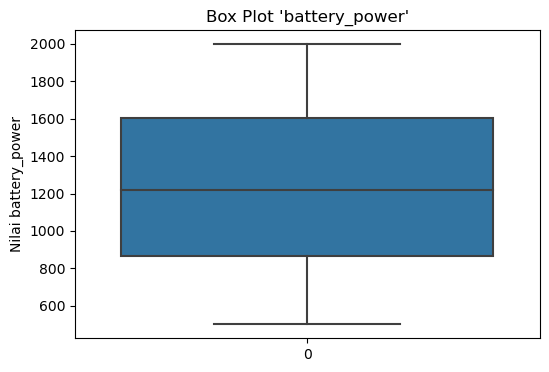


Distribusi Data untuk Kolom 'battery_power'


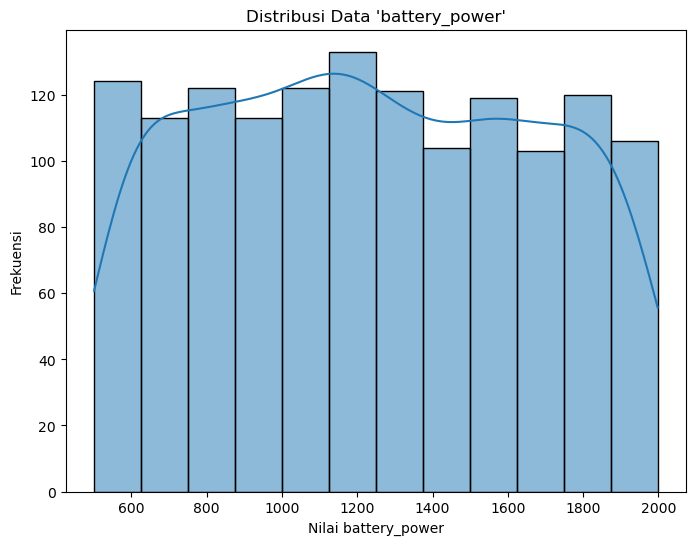


Analisis Kurtosis untuk Kolom 'battery_power'
Nilai kurtosis dari kolom 'battery_power': -1.1680683536883105
Kolom battery_power memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'battery_power' dengan Kolom Target 'price_range.'
Korelasi antara 'battery_power' dan 'price_range': 0.18480092449553118


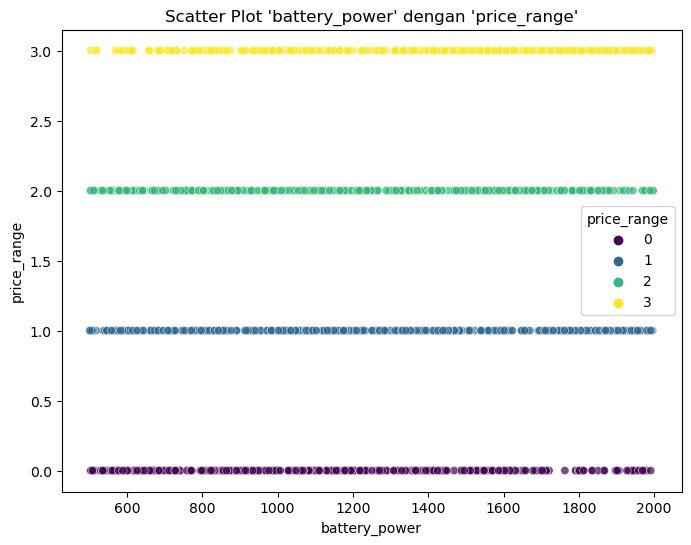

In [176]:
# Analisis Kolom battery_power 
# battery_power: Total Energi baterai dalam satu waktu diukur dalam mAh
analyze_column_numeric(df, 'battery_power', 'price_range')


Statistika Dasar untuk Kolom 'blue'


,blue
Modus,0
Banyak memiliki blue,691
Banyak tidak memiliki blue,709



Duplicate Value untuk Kolom 'blue'
Terdapat 2 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,0,709,"[1, 3, 4, 6, 7, 8, 10, 12, 13, 17, 18, 20, 21, 23, 24, 27, 28, 29, 31, 36, 37, 40, 41, 44, 45, 47, 49, 50, 51, 52, 57, 60, 61, 62, 64, 65, 69, 71, 73, 75, 77, 78, 79, 85, 87, 88, 92, 94, 100, 101, 102, 103, 105, 106, 107, 109, 112, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 131, 132, 136, 137, 142, 143, 145, 146, 147, 148, 150, 156, 157, 158, 159, 160, 163, 165, 168, 169, 171, 176, 177, 178, 179, 180, 182, 184, 185, 186, 189, 190, 191, 192, 195, 196, 199, 201, 202, 203, 204, 206, 208, 210, 215, 216, 217, 218, 219, 221, 224, 225, 228, 229, 232, 237, 238, 239, 241, 242, 243, 245, 247, 249, 252, 254, 255, 256, 257, 258, 259, 260, 263, 265, 266, 267, 268, 269, 270, 271, 276, 278, 279, 280, 281, 282, 283, 286, 289, 291, 294, 297, 298, 301, 302, 303, 305, 306, 307, 308, 311, 315, 316, 317, 319, 320, 321, 322, 323, 325, 326, 327, 330, 331, 332, 333, 334, 336, 338, 340, 342, 346, 347, 348, 350, 353, 355, 359, 360, 361, 366, 367, 369, 370, 372, 373, 377, 378, 379, 380, 381, 382, 384, 385, 387, 388, 390, 394, 397, 402, 407, 409, 410, 412, 415, 416, 417, 418, 422, 424, 426, 427, 428, 432, 433, 434, 436, 437, 439, 442, 451, 452, 454, 456, 459, 460, 461, 467, 472, 473, 474, 478, 479, 483, 485, 486, 488, 490, 493, 494, 495, 497, 498, 501, 502, 503, 504, 506, 507, 508, 512, 514, 515, 517, 518, 520, 521, 524, 525, 526, 530, 531, 532, 534, 536, 538, 539, 540, 541, 542, 543, 545, 546, 547, 548, 549, 551, 552, 555, 558, 559, 561, 564, 567, 569, 572, 579, 580, 582, 584, 585, 588, 593, 594, 597, 598, 599, 601, 602, 603, 604, 606, 608, 610, 611, 612, 613, 618, 619, 620, 621, 624, 629, 630, 631, 632, 638, 639, 641, 642, 643, 644, 645, 646, 647, 648, 650, 652, 653, 654, 656, 659, 660, 661, 663, 664, 665, 667, 668, 669, 674, 675, 680, 681, 682, 683, 685, 686, 689, 691, 695, 699, 700, 701, 704, 705, 708, 713, 716, 718, 721, 722, 725, 726, 727, 728, 731, 736, 738, 739, 740, 741, 745, 746, 749, 752, 753, 754, 755, 759, 764, 766, 768, 770, 771, 772, 779, 781, 783, 784, 789, 790, 792, 795, 796, 799, 803, 804, 808, 810, 811, 812, 813, 815, 820, 821, 824, 827, 829, 830, 831, 833, 835, 837, 838, 841, 846, 848, 849, 851, 852, 853, 855, 856, 857, 858, 861, 862, 864, 867, 872, 875, 879, 881, 887, 891, 896, 897, 898, 904, 907, 912, 914, 915, 918, 921, 924, 926, 927, 928, 929, 930, 931, 934, 935, 936, 937, 938, 941, 942, 944, 946, 948, 949, 951, 952, 953, 955, 956, 958, 959, 962, 963, 965, 966, 969, 973, 974, 976, 977, 978, 981, 982, 984, 985, 987, 988, 989, 990, 992, 993, 994, 997, 1007, 1010, 1011, 1013, 1017, 1020, 1022, 1025, 1026, 1030, 1033, 1034, 1036, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1047, 1050, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1061, 1062, 1063, 1064, 1067, 1068, 1069, 1071, 1074, 1075, 1076, 1077, 1084, 1086, 1089, 1090, 1092, 1095, 1097, 1098, 1100, 1102, 1103, 1108, 1109, 1110, 1112, 1113, 1114, 1117, 1119, 1121, 1122, 1125, 1126, 1128, 1129, 1130, 1132, 1133, 1135, 1138, 1139, 1143, 1144, 1145, 1146, 1149, 1150, 1152, 1154, 1155, 1156, 1163, 1165, 1166, 1169, 1171, 1172, 1173, 1175, 1178, 1184, 1187, 1189, 1191, 1193, 1197, 1198, 1200, 1201, 1208, 1211, 1213, 1214, 1215, 1216, 1221, 1226, 1227, 1228, 1229, 1230, 1232, 1233, 1235, 1237, 1242, 1246, 1248, 1250, 1254, 1255, 1256, 1257, 1258, 1259, 1261, 1263, 1264, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1275, 1276, 1277, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1291, 1292, 1297, 1300, 1304, 1307, 1308, 1310, 1312, 1320, 1322, 1324, 1326, 1327, 1329, 1330, 1333, 1334, 1336, 1337, 1338, 1340, 1343, 1344, 1346, 1350, 1353, 1357, 1359, 1360, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1372, 1373, 1374, 1375, 1376, 1378, 1379, 1380, 1382, 1387, 1396, 1399]"
1,1,691,"[0, 2, 5, 9, 11, 14, 15, 16, 19, 22, 25, 26, 30, 32, 33, 34, 35, 38, 39, 42, 43, 46, 48, 53, 54, 55, 56, 58, 59, 63, 66, 67, 68, 70, 72, 74, 76, 80, 81, 82, 83, 84, 86, 89, 90, 91, 93, 95, 96, 97, 98, 99, 104, 108, 110, 111, 113, 114, 115, 121, 12


Missing Value untuk Kolom 'blue'
Tidak ada missing value pada kolom blue

Outliers untuk Kolom 'blue'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom blue

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom blue


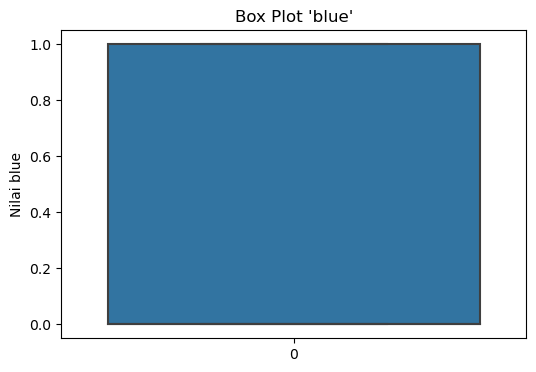

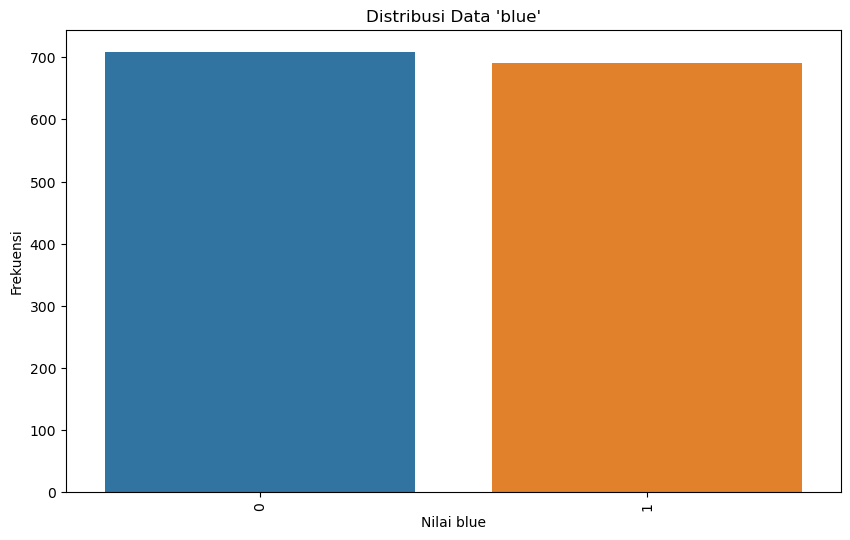


Korelasi 'blue' dengan Kolom Target 'price_range.'
Korelasi antara 'blue' dan 'price_range': 0.04194688860741438


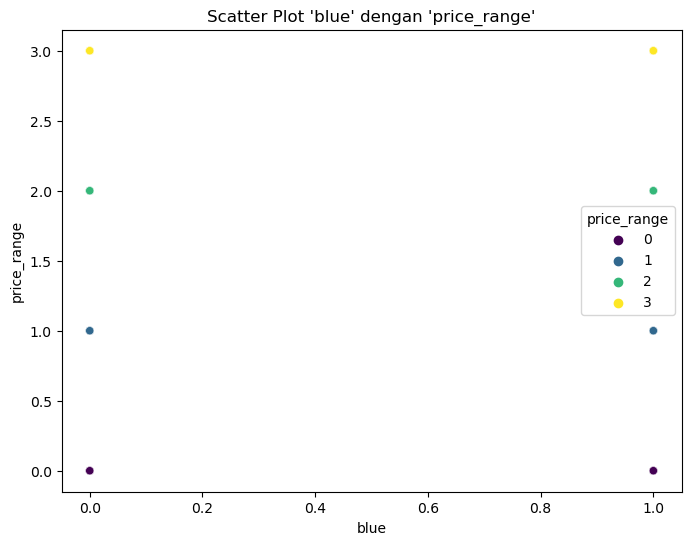

In [177]:
# Analisis Kolom blue
# blue: Memiliki bluetooth atau tidak
analyze_column_non_numeric(df, 'blue', 'price_range')


Statistika Dasar untuk Kolom 'clock_speed'


,clock_speed
Modus,0.5
Mean,1.521714
Median,1.500000
Standar Deviasi,0.814723
Variansi,0.663774
Range,2.500000
Max,3.000000
Min,0.500000
Quartile 1,0.700000
Quartile 2,1.500000



Duplicate Value untuk Kolom 'clock_speed'
Terdapat 26 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,0.500000,287,"[4, 7, 14, 18, 19, 20, 25, 46, 47, 49, 55, 56, 59, 65, 72, 73, 76, 79, 80, 83, 85, 86, 88, 91, 97, 104, 108, 118, 125, 126, 132, 133, 136, 144, 145, 147, 148, 153, 158, 159, 172, 173, 175, 186, 193, 196, 204, 211, 213, 214, 216, 219, 220, 228, 233, 249, 259, 261, 264, 265, 269, 274, 279, 284, 285, 295, 310, 317, 318, 321, 322, 326, 327, 333, 337, 339, 346, 349, 354, 355, 358, 367, 372, 374, 376, 379, 383, 387, 390, 401, 406, 411, 415, 420, 421, 422, 425, 427, 431, 447, 448, 453, 464, 475, 477, 479, 482, 486, 505, 511, 516, 523, 528, 538, 539, 541, 544, 552, 560, 562, 564, 570, 576, 580, 587, 592, 597, 601, 604, 608, 613, 615, 619, 626, 628, 629, 631, 634, 638, 642, 644, 647, 658, 662, 666, 667, 668, 683, 685, 686, 687, 688, 693, 702, 703, 713, 716, 718, 731, 735, 754, 755, 756, 760, 761, 764, 775, 780, 783, 786, 789, 804, 805, 807, 808, 809, 810, 811, 820, 827, 831, 841, 852, 854, 860, 865, 867, 873, 875, 885, 887, 901, 909, 915, 916, 919, 925, 934, 938, 941, 952, 965, 974, 984, 987, 991, 993, 994, 995, 1000, 1001, 1002, 1006, 1008, 1010, 1016, 1018, 1036, 1039, 1041, 1048, 1049, 1058, 1064, 1067, 1071, 1075, 1078, 1079, 1087, 1091, 1092, 1096, 1099, 1108, 1111, 1113, 1114, 1118, 1126, 1127, 1131, 1141, 1150, 1156, 1173, 1182, 1184, 1187, 1189, 1196, 1197, 1219, 1224, 1230, 1233, 1234, 1246, 1250, 1254, 1259, 1264, 1265, 1267, 1270, 1274, 1276, 1278, 1282, 1302, 1312, 1319, 1330, 1337, 1338, 1341, 1346, 1355, 1361, 1370, 1374, 1385, 1388, 1389, 1392, 1397, 1398]"
1,0.600000,61,"[28, 29, 45, 68, 100, 120, 122, 170, 176, 178, 198, 235, 268, 275, 302, 335, 341, 384, 395, 410, 434, 501, 554, 556, 581, 586, 588, 620, 757, 759, 829, 847, 857, 858, 868, 904, 918, 944, 946, 992, 1055, 1061, 1069, 1089, 1094, 1106, 1171, 1174, 1176, 1179, 1220, 1222, 1227, 1242, 1253, 1268, 1288, 1291, 1310, 1329, 1344]"
2,2.300000,57,"[6, 27, 51, 61, 98, 106, 107, 232, 258, 272, 288, 330, 331, 334, 343, 360, 398, 409, 414, 454, 461, 498, 500, 549, 568, 578, 583, 610, 669, 676, 707, 769, 785, 791, 826, 837, 869, 874, 896, 929, 936, 939, 1005, 1012, 1042, 1120, 1148, 1183, 1202, 1225, 1228, 1255, 1286, 1295, 1309, 1360, 1382]"
3,2.800000,57,"[13, 32, 63, 81, 102, 103, 105, 110, 112, 142, 155, 221, 236, 266, 291, 300, 347, 371, 381, 408, 438, 451, 467, 487, 492, 573, 607, 675, 679, 729, 765, 767, 776, 779, 784, 790, 802, 812, 905, 911, 970, 986, 999, 1019, 1033, 1037, 1082, 1100, 1110, 1116, 1170, 1181, 1198, 1211, 1271, 1292, 1327]"
4,2.100000,54,"[9, 11, 33, 42, 74, 146, 152, 167, 195, 203, 226, 263, 283, 299, 301, 362, 365, 405, 412, 430, 437, 472, 496, 548, 609, 663, 770, 792, 815, 834, 836, 845, 866, 923, 947, 1032, 1081, 1095, 1122, 1130, 1159, 1166, 1168, 1180, 1194, 1258, 1262, 1283, 1308, 1323, 1334, 1363, 1386, 1391]"
5,1.600000,53,"[24, 39, 78, 92, 96, 99, 111, 134, 169, 200, 222, 241, 245, 260, 273, 292, 297, 298, 314, 320, 441, 443, 459, 495, 565, 599, 606, 633, 643, 652, 659, 690, 720, 751, 788, 797, 822, 968, 972, 1020, 1027, 1050, 1070, 1112, 1121, 1158, 1204, 1247, 1336, 1345, 1366, 1376, 1393]"
6,2.000000,51,"[2, 30, 127, 157, 177, 207, 209, 227, 250, 286, 336, 352, 357, 386, 394, 417, 439, 532, 547, 590, 602, 603, 624, 640, 684, 696, 738, 753, 768, 798, 803, 850, 902, 907, 973, 979, 982, 1015, 1021, 1238, 1266, 1284, 1296, 1300, 1333, 1340, 1357, 1369, 1378, 1380, 1394]"
7,1.400000,49,"[53, 66, 90, 117, 135, 143, 151, 163, 185, 252, 271, 287, 368, 375, 399, 400, 419, 442, 444, 508, 515, 542, 579, 648, 653, 671, 672, 678, 706, 708, 749, 771, 816, 825, 828, 856, 862, 900, 912, 945, 1034, 1062, 1119, 1124, 1160, 1208, 1240, 1343, 1395]"
8,1.300000,48,"[5, 22, 38, 64, 180, 190, 206, 262, 267, 315, 324, 366, 402, 436, 449, 481, 490, 531, 546, 558, 559, 595, 752, 782, 796, 879, 880, 883, 892, 908, 920, 930, 933, 950, 956, 977, 1013, 1056, 1144, 1153, 1162, 1163, 1190, 1212, 1217, 1273, 1290, 1306]"
9,2.500000,48,"[31, 116, 119, 140, 154, 378, 382, 385, 397, 484, 510, 563, 577, 657,


Missing Value untuk Kolom 'clock_speed'
Tidak ada missing value pada kolom clock_speed

Outliers untuk Kolom 'clock_speed'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom clock_speed

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom clock_speed


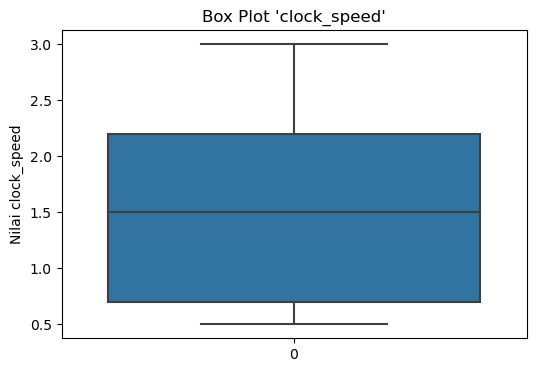


Distribusi Data untuk Kolom 'clock_speed'


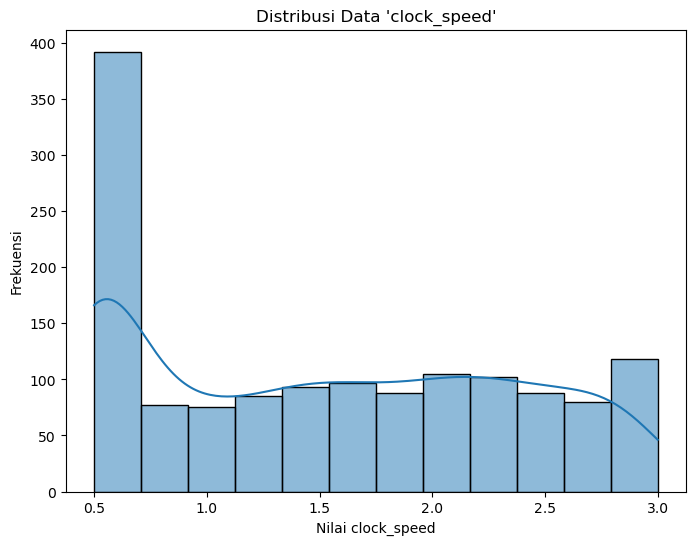


Analisis Kurtosis untuk Kolom 'clock_speed'
Nilai kurtosis dari kolom 'clock_speed': -1.3295231896521231
Kolom clock_speed memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'clock_speed' dengan Kolom Target 'price_range.'
Korelasi antara 'clock_speed' dan 'price_range': 0.014031254818008047


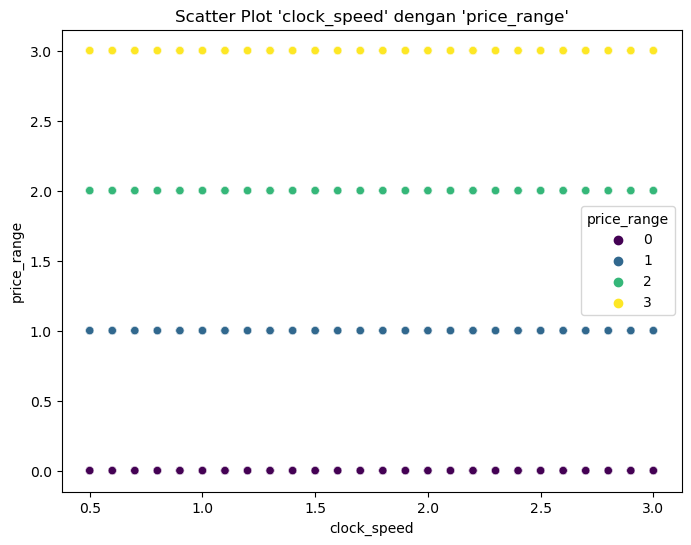

In [178]:
# Analisis Kolom clock_speed
# clock_speed: Kecepatan mikroprosesor menjalankan instruksi
analyze_column_numeric(df, 'clock_speed', 'price_range')


Statistika Dasar untuk Kolom 'dual_sim'


,dual_sim
Modus,1
Banyak memiliki dual_sim,704
Banyak tidak memiliki dual_sim,696



Duplicate Value untuk Kolom 'dual_sim'
Terdapat 2 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,1,704,"[0, 2, 4, 6, 8, 9, 10, 11, 12, 13, 19, 21, 22, 23, 24, 25, 28, 32, 33, 34, 36, 38, 40, 42, 46, 47, 50, 53, 54, 56, 58, 59, 60, 61, 63, 65, 66, 67, 68, 74, 75, 76, 80, 82, 85, 87, 91, 92, 93, 96, 98, 100, 103, 105, 109, 114, 119, 120, 121, 123, 125, 128, 129, 130, 133, 135, 139, 140, 144, 146, 150, 152, 155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 172, 178, 180, 182, 183, 188, 189, 190, 191, 199, 202, 204, 205, 207, 208, 210, 213, 215, 217, 220, 222, 225, 226, 227, 228, 230, 232, 233, 236, 237, 240, 241, 242, 245, 248, 249, 252, 254, 260, 262, 264, 266, 267, 272, 273, 274, 275, 276, 277, 286, 289, 291, 292, 295, 300, 301, 302, 303, 304, 306, 310, 312, 314, 315, 318, 321, 322, 323, 324, 325, 326, 331, 336, 337, 338, 339, 340, 341, 344, 345, 346, 348, 349, 351, 353, 355, 356, 359, 360, 361, 362, 364, 366, 367, 370, 374, 377, 381, 383, 385, 386, 390, 391, 392, 396, 406, 408, 413, 416, 418, 419, 420, 421, 423, 424, 431, 432, 433, 435, 438, 443, 444, 445, 447, 449, 452, 460, 462, 463, 468, 470, 474, 477, 482, 483, 489, 490, 493, 494, 495, 496, 499, 500, 501, 502, 505, 506, 509, 510, 511, 516, 517, 518, 519, 520, 523, 524, 527, 529, 531, 532, 533, 536, 537, 540, 541, 545, 550, 552, 558, 560, 562, 565, 567, 568, 569, 574, 575, 576, 577, 579, 583, 585, 586, 587, 589, 590, 592, 594, 595, 597, 598, 599, 600, 602, 604, 606, 607, 609, 610, 611, 614, 616, 618, 619, 622, 623, 628, 630, 632, 634, 636, 639, 640, 641, 643, 648, 649, 650, 651, 652, 653, 654, 656, 659, 660, 664, 666, 668, 669, 671, 674, 675, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 691, 693, 696, 697, 698, 702, 704, 706, 707, 709, 712, 716, 717, 718, 719, 721, 722, 723, 726, 728, 729, 731, 732, 733, 734, 735, 737, 738, 739, 741, 743, 745, 748, 749, 750, 752, 753, 754, 755, 757, 759, 760, 761, 765, 770, 771, 772, 774, 775, 776, 777, 778, 779, 781, 784, 787, 788, 789, 791, 792, 793, 794, 801, 807, 808, 809, 814, 815, 817, 818, 820, 822, 823, 827, 828, 829, 831, 832, 833, 835, 836, 838, 839, 840, 842, 843, 844, 845, 849, 851, 852, 853, 855, 858, 861, 863, 864, 865, 868, 869, 870, 871, 873, 874, 879, 881, 882, 883, 884, 885, 887, 888, 891, 896, 903, 905, 908, 910, 911, 912, 913, 914, 915, 917, 918, 919, 923, 924, 925, 926, 928, 930, 932, 933, 936, 940, 942, 944, 945, 946, 947, 948, 949, 950, 951, 953, 954, 955, 958, 960, 961, 962, 963, 968, 969, 971, 972, 974, 975, 978, 980, 981, 982, 986, 987, 989, 990, 991, 995, 1000, 1002, 1004, 1006, 1007, 1008, 1010, 1014, 1018, 1020, 1022, 1034, 1035, 1036, 1037, 1040, 1041, 1042, 1049, 1050, 1053, 1054, 1055, 1057, 1060, 1062, 1063, 1064, 1065, 1066, 1070, 1073, 1075, 1077, 1079, 1081, 1082, 1086, 1090, 1091, 1092, 1093, 1094, 1098, 1100, 1102, 1103, 1104, 1106, 1107, 1109, 1115, 1116, 1117, 1119, 1122, 1124, 1126, 1127, 1128, 1129, 1130, 1133, 1134, 1136, 1137, 1139, 1140, 1141, 1142, 1143, 1144, 1146, 1151, 1152, 1153, 1155, 1157, 1158, 1159, 1161, 1162, 1163, 1165, 1169, 1170, 1171, 1173, 1174, 1175, 1176, 1177, 1179, 1181, 1184, 1188, 1189, 1190, 1193, 1194, 1195, 1196, 1198, 1201, 1202, 1204, 1207, 1208, 1209, 1211, 1213, 1214, 1216, 1218, 1219, 1220, 1224, 1227, 1230, 1232, 1236, 1237, 1238, 1241, 1242, 1243, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1257, 1260, 1261, 1262, 1263, 1266, 1269, 1271, 1273, 1274, 1277, 1279, 1282, 1284, 1286, 1288, 1290, 1292, 1296, 1298, 1302, 1303, 1304, 1308, 1310, 1311, 1315, 1316, 1320, 1321, 1323, 1325, 1326, 1329, 1330, 1332, 1333, 1335, 1337, 1338, 1339, 1340, 1341, 1346, 1347, 1348, 1349, 1351, 1352, 1353, 1354, 1357, 1358, 1361, 1363, 1364, 1365, 1366, 1368, 1370, 1374, 1375, 1377, 1378, 1379, 1383, 1384, 1385, 1390, 1392, 1393, 1394, 1398]"
1,0,696,"[1, 3, 5, 7, 14, 15, 16, 17, 18, 20, 26, 27, 29, 30, 31, 35, 37, 39, 41, 43, 44, 45, 48, 49, 51, 52, 55, 57, 62, 64, 69, 70, 71, 72, 73, 77, 78, 79, 81, 83, 84, 86, 88, 89, 90, 94, 95, 97, 99, 101, 102, 104, 106, 107, 108, 110, 111, 112, 113, 115, 116, 117, 118, 12


Missing Value untuk Kolom 'dual_sim'
Tidak ada missing value pada kolom dual_sim

Outliers untuk Kolom 'dual_sim'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom dual_sim

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom dual_sim


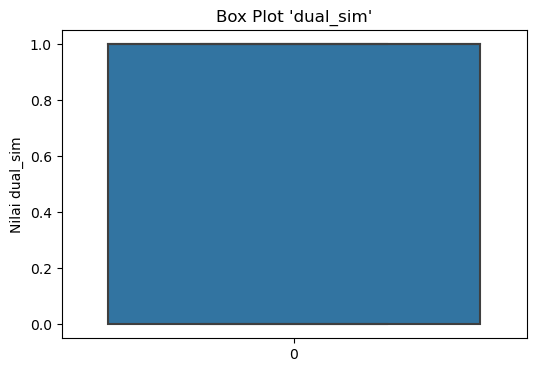

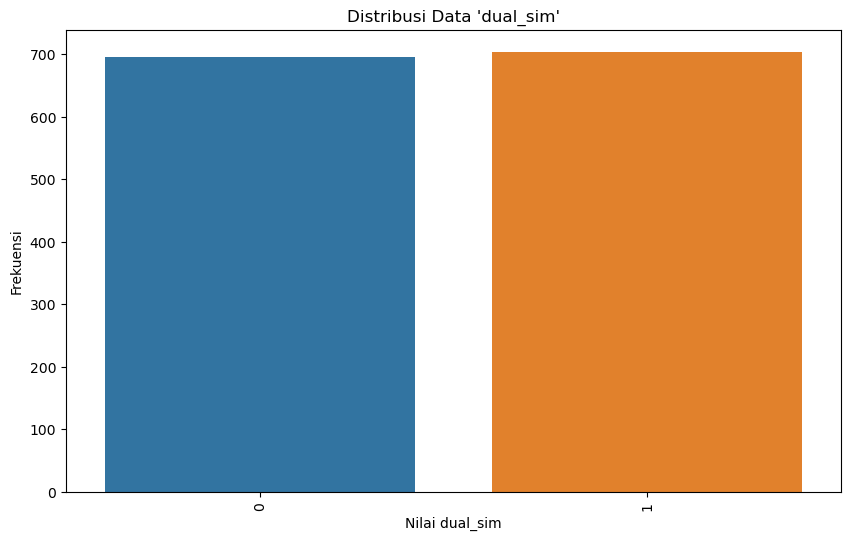


Korelasi 'dual_sim' dengan Kolom Target 'price_range.'
Korelasi antara 'dual_sim' dan 'price_range': -0.010756163737640935


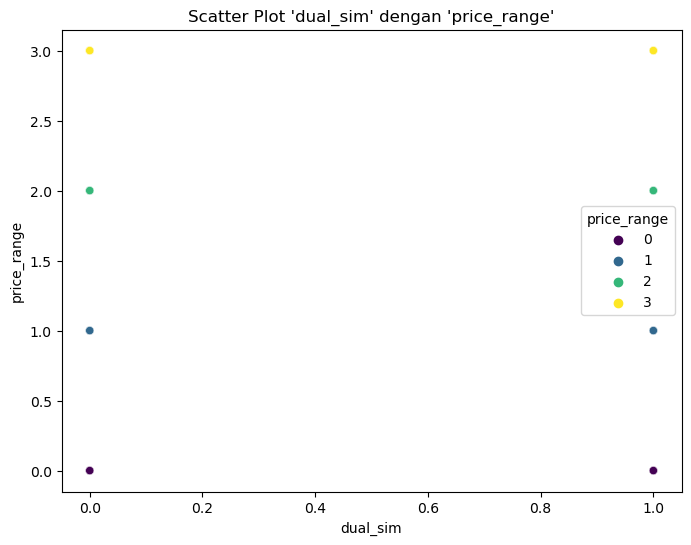

In [179]:
# Analisis Kolom dual_sim
# dual_sim: Memiliki dukungan dual sim atau tidak
analyze_column_non_numeric(df, 'dual_sim', 'price_range')


Statistika Dasar untuk Kolom 'fc'


,fc
Modus,0
Mean,4.275000
Median,3.000000
Standar Deviasi,4.324170
Variansi,18.698445
Range,19
Max,19
Min,0
Quartile 1,1.000000
Quartile 2,3.000000



Duplicate Value untuk Kolom 'fc'
Terdapat 19 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,0,338,"[2, 11, 12, 14, 19, 20, 26, 27, 34, 37, 45, 61, 66, 69, 70, 81, 83, 86, 87, 92, 97, 110, 121, 130, 131, 132, 139, 141, 143, 144, 148, 155, 159, 165, 167, 170, 173, 174, 182, 192, 193, 196, 201, 206, 209, 210, 216, 217, 221, 224, 226, 234, 236, 237, 238, 248, 258, 259, 261, 264, 269, 271, 273, 277, 280, 286, 287, 301, 311, 314, 319, 326, 334, 335, 337, 345, 348, 355, 357, 359, 363, 364, 369, 373, 375, 376, 383, 389, 393, 395, 397, 406, 408, 417, 419, 425, 436, 437, 439, 441, 442, 444, 453, 456, 457, 460, 465, 468, 475, 476, 479, 484, 486, 489, 496, 500, 503, 504, 505, 506, 510, 515, 516, 517, 525, 528, 531, 533, 535, 538, 539, 541, 542, 544, 548, 552, 554, 558, 560, 563, 564, 566, 569, 585, 588, 589, 590, 591, 600, 606, 607, 612, 614, 622, 624, 634, 641, 642, 644, 646, 659, 661, 670, 671, 682, 691, 696, 697, 699, 703, 707, 712, 716, 719, 720, 726, 729, 732, 734, 739, 741, 750, 753, 760, 773, 774, 776, 787, 790, 792, 793, 795, 796, 808, 809, 812, 814, 815, 826, 832, 833, 835, 841, 847, 858, 870, 876, 883, 888, 889, 891, 899, 902, 903, 904, 908, 909, 911, 913, 915, 916, 917, 920, 922, 935, 936, 937, 960, 966, 969, 972, 974, 980, 982, 987, 994, 1000, 1002, 1004, 1005, 1009, 1014, 1021, 1023, 1026, 1027, 1037, 1039, 1040, 1041, 1043, 1051, 1054, 1059, 1063, 1066, 1067, 1068, 1073, 1089, 1090, 1092, 1094, 1099, 1103, 1108, 1113, 1116, 1119, 1122, 1139, 1140, 1146, 1152, 1154, 1155, 1160, 1161, 1163, 1165, 1167, 1171, 1175, 1178, 1182, 1185, 1186, 1187, 1188, 1193, 1194, 1204, 1207, 1211, 1212, 1220, 1221, 1223, 1224, 1227, 1233, 1235, 1237, 1251, 1252, 1253, 1254, 1257, 1267, 1268, 1269, 1277, 1285, 1288, 1292, 1311, 1318, 1320, 1323, 1336, 1338, 1341, 1350, 1359, 1361, 1362, 1366, 1367, 1368, 1370, 1375, 1381, 1387, 1388, 1389, 1394, 1395, 1398]"
1,1,172,"[3, 4, 5, 13, 16, 21, 38, 41, 42, 47, 48, 54, 56, 57, 59, 76, 77, 90, 95, 112, 116, 120, 128, 133, 178, 187, 195, 199, 203, 212, 219, 225, 230, 232, 235, 243, 250, 252, 255, 266, 276, 279, 299, 305, 317, 329, 336, 341, 344, 352, 360, 362, 371, 387, 392, 415, 423, 443, 449, 464, 477, 481, 501, 502, 511, 543, 549, 568, 572, 573, 577, 581, 582, 587, 592, 602, 604, 615, 618, 632, 639, 640, 645, 649, 650, 654, 656, 657, 668, 669, 683, 701, 706, 718, 733, 737, 738, 748, 752, 761, 767, 781, 789, 791, 805, 816, 824, 829, 842, 848, 864, 869, 875, 884, 886, 898, 907, 928, 931, 934, 939, 953, 961, 964, 965, 968, 985, 997, 1013, 1016, 1017, 1019, 1024, 1029, 1031, 1050, 1055, 1078, 1086, 1096, 1097, 1100, 1109, 1110, 1124, 1131, 1133, 1144, 1148, 1162, 1172, 1177, 1196, 1213, 1214, 1240, 1259, 1261, 1279, 1291, 1297, 1299, 1304, 1309, 1325, 1330, 1335, 1340, 1353, 1355, 1357, 1373]"
2,2,133,"[7, 8, 9, 23, 36, 58, 71, 99, 114, 117, 145, 147, 162, 185, 189, 240, 244, 275, 278, 284, 304, 309, 316, 318, 325, 327, 347, 350, 353, 394, 401, 404, 420, 424, 432, 451, 455, 463, 467, 472, 473, 487, 488, 498, 509, 514, 518, 523, 527, 556, 561, 570, 579, 580, 594, 597, 611, 620, 637, 653, 664, 666, 674, 684, 698, 731, 763, 783, 799, 803, 806, 828, 830, 839, 853, 855, 857, 866, 868, 872, 881, 901, 910, 943, 945, 949, 963, 981, 1007, 1012, 1018, 1028, 1032, 1038, 1047, 1064, 1077, 1079, 1082, 1091, 1105, 1128, 1132, 1141, 1156, 1158, 1166, 1174, 1195, 1197, 1201, 1226, 1230, 1238, 1242, 1245, 1248, 1266, 1278, 1287, 1294, 1303, 1306, 1321, 1333, 1339, 1346, 1354, 1363, 1371, 1372, 1376, 1378]"
3,3,117,"[22, 29, 43, 44, 60, 63, 84, 85, 142, 153, 157, 163, 164, 179, 186, 204, 223, 228, 254, 265, 292, 294, 298, 333, 340, 356, 367, 368, 374, 378, 386, 391, 405, 428, 431, 438, 454, 471, 478, 482, 499, 508, 513, 521, 530, 536, 537, 555, 557, 559, 605, 623, 633, 648, 652, 667, 678, 709, 735, 743, 744, 749, 756, 757, 758, 762, 771, 775, 798, 802, 817, 827, 837, 840, 846, 856, 861, 879, 894, 896, 918, 932, 979, 983, 991, 998, 1049, 1062, 1065, 1081, 1088, 1093, 1104, 1136, 1164, 1168, 1198, 1200, 1206, 1218, 1219, 1244, 1246, 1249, 1263, 1264, 1276, 1283, 1307, 1


Missing Value untuk Kolom 'fc'
Tidak ada missing value pada kolom fc

Outliers untuk Kolom 'fc'
Identifikasi Outliers dengan IQR
Jumlah outliers dalam kolom fc : 11
Nilai-nilai outliers: <kolom-value>
 53      19
98      18
413     17
603     18
778     18
797     17
1035    18
1072    18
1150    18
1232    18
1342    17
Name: fc, dtype: int64

Identifikasi Outliers dengan Z-Score
Jumlah outliers dalam kolom fc : 8
Nilai-nilai outliers: <kolom-value>
 53      19
98      18
603     18
778     18
1035    18
1072    18
1150    18
1232    18
Name: fc, dtype: int64


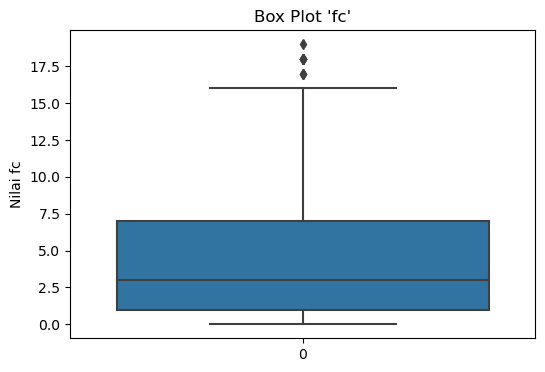


Distribusi Data untuk Kolom 'fc'


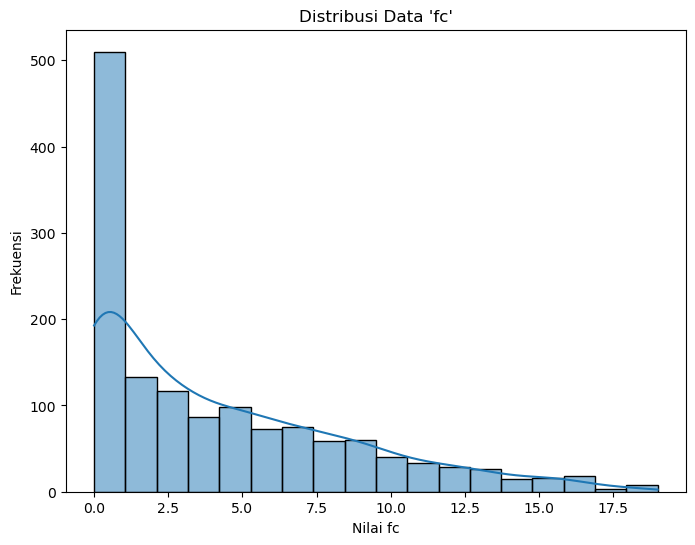


Analisis Kurtosis untuk Kolom 'fc'
Nilai kurtosis dari kolom 'fc': 0.29340439238319194
Kolom fc memiliki jenis kurtosis leptokurtis, yaitu distribusi lebih lancip atau lebih ramping dibandingkan terhadap distribusi normal.

Korelasi 'fc' dengan Kolom Target 'price_range.'
Korelasi antara 'fc' dan 'price_range': -0.003842010298191756


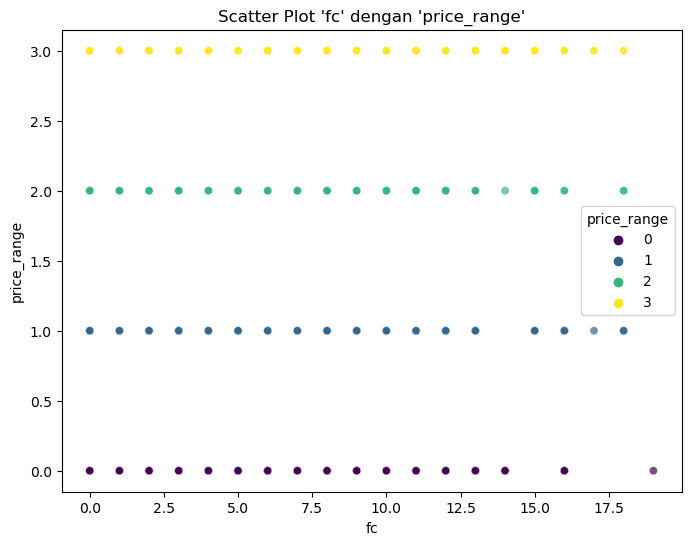

In [180]:
# Analisis Kolom fc
# fc: Resolusi kamera depan dalam megapiksel
analyze_column_numeric(df, 'fc', 'price_range')


Statistika Dasar untuk Kolom 'four_g'


,four_g
Modus,1
Banyak memiliki four_g,742
Banyak tidak memiliki four_g,658



Duplicate Value untuk Kolom 'four_g'
Terdapat 2 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,1,742,"[0, 1, 3, 6, 7, 9, 10, 12, 14, 15, 17, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 34, 37, 38, 40, 41, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 56, 57, 59, 61, 63, 64, 65, 66, 67, 69, 72, 74, 76, 79, 81, 82, 83, 84, 87, 94, 95, 97, 99, 100, 101, 102, 107, 108, 110, 111, 112, 113, 114, 115, 117, 119, 124, 126, 127, 129, 132, 133, 134, 136, 138, 139, 141, 142, 145, 147, 148, 149, 150, 151, 152, 155, 156, 159, 161, 163, 164, 165, 166, 171, 173, 175, 176, 177, 178, 182, 187, 189, 190, 191, 194, 196, 197, 198, 199, 200, 202, 203, 204, 207, 208, 210, 213, 214, 215, 216, 218, 221, 223, 225, 226, 230, 232, 234, 238, 239, 241, 244, 248, 250, 253, 254, 255, 256, 258, 259, 260, 261, 262, 264, 265, 267, 269, 275, 276, 277, 279, 280, 282, 283, 286, 287, 289, 290, 293, 298, 301, 305, 308, 309, 311, 313, 315, 317, 318, 319, 320, 321, 322, 323, 325, 326, 328, 330, 333, 334, 336, 337, 339, 340, 341, 342, 343, 344, 345, 346, 349, 350, 351, 353, 354, 355, 359, 361, 362, 364, 366, 368, 371, 372, 374, 376, 379, 382, 384, 387, 388, 389, 391, 393, 395, 397, 403, 405, 407, 409, 415, 418, 419, 422, 423, 425, 427, 430, 431, 432, 433, 435, 439, 440, 443, 444, 445, 447, 449, 450, 456, 457, 458, 459, 460, 461, 462, 467, 470, 473, 477, 479, 480, 482, 485, 486, 487, 488, 489, 492, 495, 496, 497, 498, 499, 502, 503, 504, 505, 506, 511, 512, 515, 518, 520, 522, 523, 524, 525, 526, 529, 531, 533, 534, 535, 536, 537, 539, 540, 544, 545, 548, 551, 552, 553, 555, 559, 560, 562, 563, 565, 566, 568, 569, 574, 576, 577, 579, 580, 582, 583, 584, 585, 588, 590, 593, 594, 596, 597, 598, 599, 600, 602, 606, 608, 611, 612, 613, 615, 616, 617, 618, 619, 621, 623, 624, 625, 634, 638, 641, 642, 647, 652, 653, 654, 655, 657, 659, 660, 662, 663, 664, 665, 666, 670, 671, 672, 673, 676, 677, 678, 681, 682, 684, 688, 692, 694, 697, 699, 706, 708, 713, 714, 715, 721, 723, 724, 725, 727, 728, 731, 732, 734, 736, 739, 741, 743, 744, 745, 750, 754, 756, 758, 759, 763, 764, 766, 767, 768, 774, 776, 778, 780, 781, 782, 785, 788, 795, 796, 797, 798, 801, 803, 805, 806, 808, 810, 812, 813, 816, 817, 819, 820, 822, 827, 828, 831, 832, 836, 837, 839, 844, 845, 847, 848, 849, 850, 851, 852, 855, 856, 857, 862, 863, 864, 866, 868, 870, 872, 874, 875, 876, 880, 881, 882, 885, 887, 889, 894, 897, 899, 900, 901, 902, 903, 904, 905, 906, 908, 911, 913, 914, 918, 919, 924, 925, 928, 929, 930, 931, 936, 938, 939, 944, 945, 946, 947, 951, 952, 954, 956, 962, 963, 964, 966, 967, 969, 970, 971, 974, 980, 981, 983, 987, 988, 989, 990, 991, 993, 994, 995, 996, 998, 999, 1002, 1003, 1005, 1006, 1012, 1014, 1015, 1016, 1019, 1021, 1022, 1023, 1026, 1027, 1028, 1029, 1030, 1031, 1034, 1035, 1036, 1037, 1038, 1040, 1042, 1048, 1049, 1050, 1053, 1054, 1059, 1062, 1063, 1065, 1066, 1067, 1071, 1073, 1074, 1075, 1076, 1077, 1078, 1080, 1083, 1084, 1085, 1086, 1087, 1088, 1090, 1092, 1093, 1095, 1096, 1099, 1105, 1108, 1109, 1112, 1114, 1115, 1116, 1117, 1119, 1120, 1122, 1123, 1124, 1126, 1127, 1132, 1133, 1136, 1137, 1139, 1140, 1141, 1145, 1146, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1157, 1158, 1159, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1174, 1175, 1177, 1181, 1182, 1183, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1198, 1199, 1202, 1203, 1205, 1209, 1210, 1212, 1214, 1215, 1216, 1217, 1218, 1219, 1221, 1222, 1223, 1224, 1228, 1229, 1230, 1232, 1233, 1237, 1238, 1239, 1241, 1242, 1245, 1248, 1250, 1252, 1253, 1256, 1257, 1258, 1259, 1264, 1266, 1267, 1274, 1276, 1278, 1279, 1281, 1282, 1283, 1284, 1285, 1288, 1289, 1292, 1293, 1298, 1299, 1300, 1303, 1304, 1307, 1309, 1310, 1311, 1312, 1314, 1315, 1316, 1317, 1318, 1322, 1326, 1329, 1331, 1332, 1334, 1335, 1337, 1340, 1341, 1344, 1351, 1352, 1353, 1355, 1359, 1362, 1363, 1364, 1366, 1367, 1368, 1369, 1370, 1373, 1380, 1382, 1383, 1385, 1388, 1392, 1393, 1395, 1396, 1397, 1398, 1399]"
1,0,658,"[2, 4, 5, 8, 11, 13, 16, 18, 25, 29, 33, 35, 36, 39, 42, 47, 48, 55, 58,


Missing Value untuk Kolom 'four_g'
Tidak ada missing value pada kolom four_g

Outliers untuk Kolom 'four_g'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom four_g

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom four_g


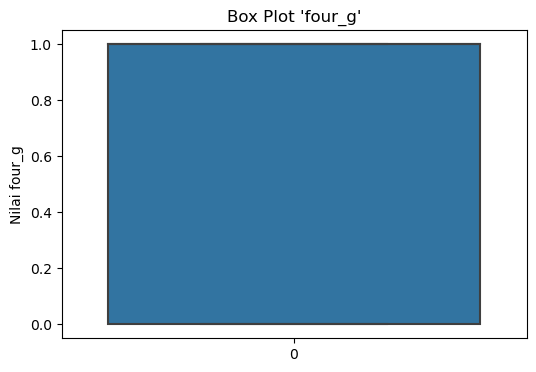

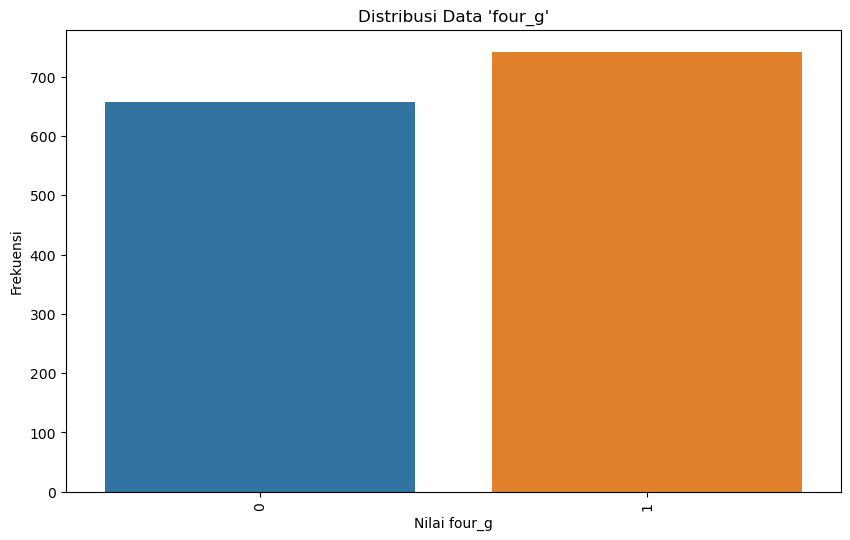


Korelasi 'four_g' dengan Kolom Target 'price_range.'
Korelasi antara 'four_g' dan 'price_range': 0.0005508484718003555


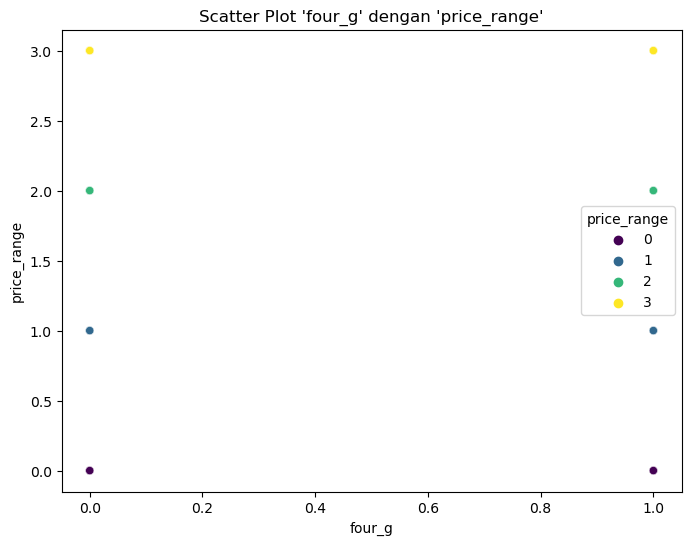

In [181]:
# Analisis Kolom four_g
# four_g: Memiliki 4G atau tidak
analyze_column_non_numeric(df, 'four_g', 'price_range')


Statistika Dasar untuk Kolom 'int_memory'


,int_memory
Modus,27
Mean,31.962143
Median,32.000000
Standar Deviasi,18.162970
Variansi,329.893491
Range,62
Max,64
Min,2
Quartile 1,16.000000
Quartile 2,32.000000



Duplicate Value untuk Kolom 'int_memory'
Terdapat 63 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,27,36,"[37, 65, 70, 145, 164, 168, 217, 224, 228, 237, 248, 370, 389, 443, 489, 490, 501, 563, 572, 604, 683, 746, 750, 772, 780, 811, 889, 912, 966, 1087, 1156, 1158, 1219, 1274, 1298, 1384]"
1,16,30,"[56, 124, 173, 184, 266, 293, 306, 307, 415, 434, 441, 475, 479, 513, 522, 752, 796, 864, 873, 917, 933, 937, 971, 972, 1033, 1061, 1118, 1135, 1271, 1377]"
2,19,29,"[235, 251, 264, 313, 326, 344, 496, 514, 515, 533, 548, 581, 584, 589, 593, 630, 672, 814, 845, 854, 867, 918, 921, 953, 1060, 1157, 1306, 1338, 1358]"
3,5,29,"[7, 172, 191, 213, 346, 412, 413, 477, 486, 527, 552, 571, 614, 748, 774, 809, 838, 991, 1011, 1012, 1077, 1089, 1090, 1137, 1170, 1203, 1209, 1253, 1301]"
4,42,28,"[198, 253, 332, 358, 383, 410, 424, 445, 508, 517, 650, 734, 759, 762, 771, 884, 945, 973, 993, 1083, 1091, 1149, 1152, 1190, 1191, 1291, 1296, 1353]"
5,23,28,"[72, 132, 159, 231, 329, 330, 348, 353, 381, 391, 553, 558, 561, 592, 619, 684, 731, 817, 840, 943, 964, 974, 1193, 1286, 1295, 1339, 1340, 1398]"
6,50,28,"[5, 10, 19, 86, 105, 162, 302, 314, 318, 336, 341, 458, 582, 663, 675, 755, 799, 829, 832, 880, 898, 915, 1063, 1179, 1186, 1235, 1275, 1389]"
7,2,28,"[32, 50, 82, 87, 103, 239, 256, 262, 363, 570, 585, 610, 634, 693, 833, 865, 1003, 1006, 1021, 1044, 1046, 1057, 1106, 1151, 1159, 1184, 1329, 1372]"
8,14,28,"[34, 126, 127, 129, 209, 261, 378, 385, 449, 520, 594, 648, 730, 745, 753, 835, 839, 923, 969, 978, 1109, 1145, 1155, 1254, 1265, 1319, 1324, 1337]"
9,33,28,"[9, 49, 54, 133, 163, 233, 254, 339, 447, 451, 560, 690, 712, 721, 724, 765, 847, 906, 968, 1001, 1043, 1068, 1099, 1139, 1146, 1341, 1365, 1371]"



Missing Value untuk Kolom 'int_memory'
Tidak ada missing value pada kolom int_memory

Outliers untuk Kolom 'int_memory'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom int_memory

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom int_memory


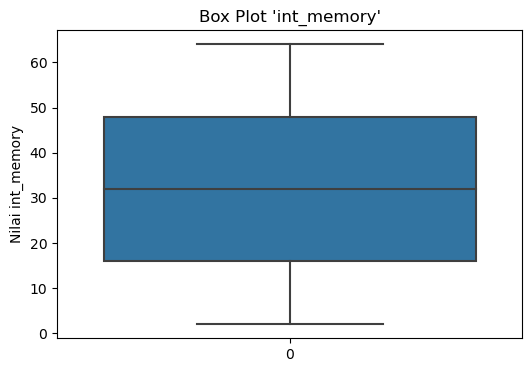


Distribusi Data untuk Kolom 'int_memory'


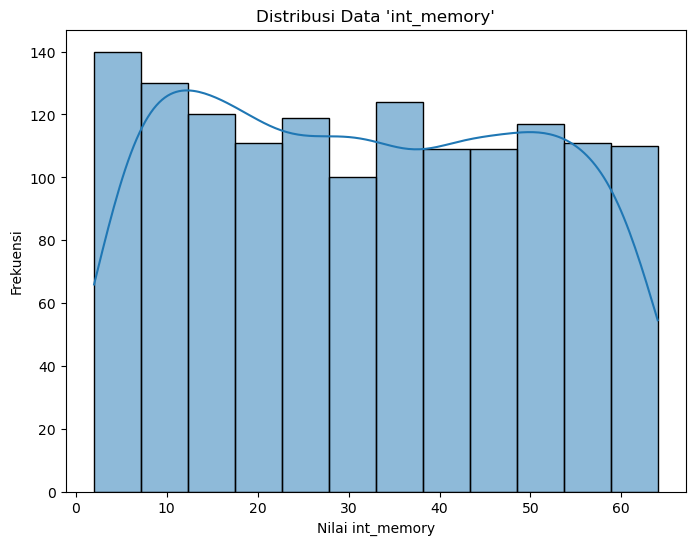


Analisis Kurtosis untuk Kolom 'int_memory'
Nilai kurtosis dari kolom 'int_memory': -1.22719971066165
Kolom int_memory memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'int_memory' dengan Kolom Target 'price_range.'
Korelasi antara 'int_memory' dan 'price_range': 0.026175706877841626


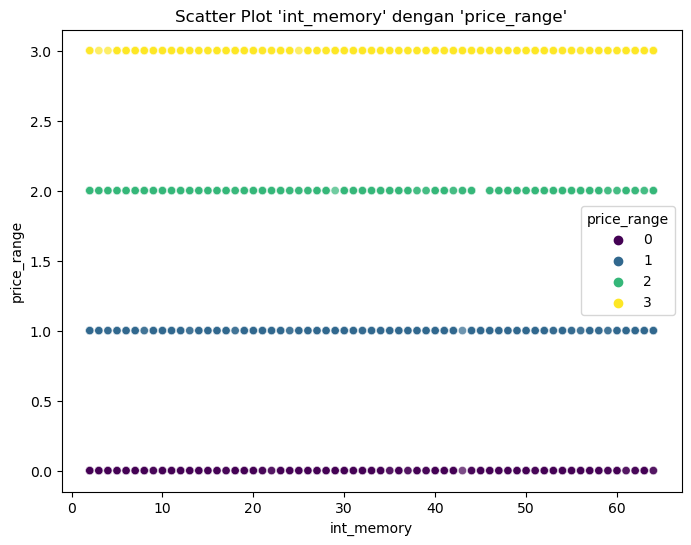

In [182]:
# Analisis Kolom int_memory
# int_memory: Memori internal dalam gigabyte
analyze_column_numeric(df, 'int_memory', 'price_range')


Statistika Dasar untuk Kolom 'm_dep'


,m_dep
Modus,0.1
Mean,0.507857
Median,0.500000
Standar Deviasi,0.288539
Variansi,0.083255
Range,0.900000
Max,1.000000
Min,0.100000
Quartile 1,0.200000
Quartile 2,0.500000



Duplicate Value untuk Kolom 'm_dep'
Terdapat 10 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,0.100000,223,"[24, 28, 30, 33, 34, 36, 41, 55, 64, 69, 72, 74, 84, 95, 103, 104, 105, 110, 120, 122, 141, 142, 150, 151, 155, 166, 168, 169, 173, 174, 189, 192, 217, 232, 234, 239, 242, 248, 257, 258, 270, 275, 285, 291, 300, 306, 307, 311, 314, 315, 318, 348, 349, 358, 359, 368, 374, 381, 394, 399, 404, 409, 413, 414, 417, 445, 450, 453, 463, 464, 465, 471, 473, 476, 477, 479, 485, 486, 490, 500, 508, 511, 515, 517, 519, 523, 534, 546, 554, 557, 558, 561, 563, 577, 579, 586, 587, 589, 592, 594, 597, 609, 611, 617, 622, 629, 642, 643, 650, 656, 659, 660, 663, 666, 670, 673, 681, 682, 702, 714, 719, 723, 727, 736, 739, 743, 751, 758, 762, 767, 799, 806, 808, 814, 829, 831, 834, 841, 844, 873, 875, 878, 879, 889, 898, 904, 913, 920, 924, 929, 942, 952, 958, 966, 974, 975, 983, 1003, 1012, 1029, 1035, 1041, 1057, 1068, 1076, 1079, 1085, 1093, 1096, 1104, 1106, 1117, 1122, 1132, 1135, 1138, 1142, 1144, 1156, 1159, 1160, 1165, 1168, 1171, 1176, 1179, 1180, 1183, 1185, 1188, 1212, 1219, 1223, 1236, 1239, 1247, 1252, 1255, 1258, 1266, 1268, 1271, 1285, 1294, 1304, 1308, 1312, 1336, 1337, 1340, 1341, 1343, 1344, 1346, 1349, 1350, 1363, 1370, 1383, 1385, 1392, 1394, 1396]"
1,0.800000,146,"[10, 17, 19, 45, 59, 63, 67, 68, 94, 102, 109, 112, 115, 117, 118, 129, 131, 134, 138, 146, 163, 177, 201, 204, 210, 230, 235, 241, 251, 256, 267, 268, 281, 284, 290, 298, 320, 342, 364, 371, 373, 380, 387, 391, 392, 403, 438, 442, 443, 452, 454, 457, 484, 497, 499, 509, 527, 542, 549, 550, 569, 576, 582, 596, 601, 623, 633, 634, 637, 646, 665, 672, 675, 692, 699, 701, 716, 738, 740, 742, 779, 824, 828, 832, 837, 845, 852, 857, 860, 865, 870, 872, 876, 897, 919, 930, 951, 957, 961, 964, 965, 973, 987, 988, 990, 1008, 1011, 1019, 1021, 1032, 1067, 1080, 1089, 1108, 1123, 1136, 1143, 1148, 1149, 1164, 1181, 1187, 1197, 1204, 1208, 1216, 1225, 1230, 1231, 1232, 1244, 1254, 1257, 1261, 1263, 1265, 1286, 1287, 1317, 1327, 1352, 1356, 1361, 1378, 1380, 1399]"
2,0.300000,146,"[12, 23, 43, 47, 53, 57, 58, 62, 73, 82, 86, 101, 113, 136, 137, 148, 156, 157, 170, 181, 186, 188, 198, 214, 227, 243, 244, 249, 250, 260, 262, 263, 265, 280, 292, 302, 303, 339, 341, 346, 350, 352, 354, 355, 357, 375, 395, 400, 415, 432, 446, 472, 480, 492, 493, 495, 498, 532, 540, 541, 544, 555, 568, 574, 588, 603, 604, 606, 608, 626, 657, 671, 680, 689, 694, 696, 707, 728, 744, 755, 757, 760, 773, 778, 780, 781, 788, 796, 803, 817, 819, 858, 859, 864, 887, 907, 911, 914, 935, 936, 948, 950, 962, 963, 970, 992, 1006, 1009, 1014, 1018, 1020, 1036, 1050, 1053, 1071, 1087, 1098, 1107, 1110, 1115, 1133, 1153, 1161, 1191, 1194, 1199, 1224, 1227, 1251, 1256, 1260, 1267, 1276, 1282, 1284, 1293, 1297, 1298, 1306, 1307, 1329, 1366, 1369, 1377, 1382, 1397]"
3,0.700000,144,"[5, 7, 16, 22, 27, 29, 31, 37, 52, 78, 83, 93, 97, 126, 135, 147, 164, 199, 212, 220, 223, 238, 255, 261, 279, 287, 289, 294, 305, 312, 331, 335, 351, 367, 377, 379, 396, 402, 411, 423, 424, 426, 428, 437, 439, 440, 459, 462, 481, 491, 502, 505, 507, 521, 539, 556, 573, 581, 591, 598, 599, 614, 624, 648, 667, 688, 697, 700, 708, 712, 717, 732, 737, 754, 764, 775, 791, 804, 805, 820, 839, 855, 856, 877, 903, 905, 909, 915, 923, 926, 932, 937, 941, 945, 947, 955, 976, 979, 981, 1010, 1013, 1023, 1026, 1027, 1031, 1038, 1055, 1066, 1074, 1075, 1088, 1094, 1103, 1112, 1114, 1119, 1129, 1151, 1155, 1157, 1158, 1178, 1186, 1207, 1214, 1215, 1222, 1226, 1301, 1313, 1318, 1330, 1331, 1333, 1353, 1355, 1365, 1367, 1373, 1374, 1375, 1379, 1387, 1395]"
4,0.500000,142,"[2, 8, 18, 25, 26, 35, 39, 46, 50, 76, 79, 98, 100, 107, 127, 132, 133, 144, 158, 175, 185, 191, 216, 222, 236, 266, 286, 308, 317, 321, 327, 333, 336, 353, 412, 418, 422, 429, 436, 441, 447, 448, 467, 475, 482, 483, 494, 518, 520, 536, 551, 552, 559, 564, 565, 575, 578, 590, 607, 616, 620, 640, 649, 668, 677, 683, 713, 720, 729, 730, 731, 735, 741, 761, 768, 772, 783, 786, 787, 789, 790, 794, 797, 807, 811, 818, 822, 823, 82


Missing Value untuk Kolom 'm_dep'
Tidak ada missing value pada kolom m_dep

Outliers untuk Kolom 'm_dep'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom m_dep

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom m_dep


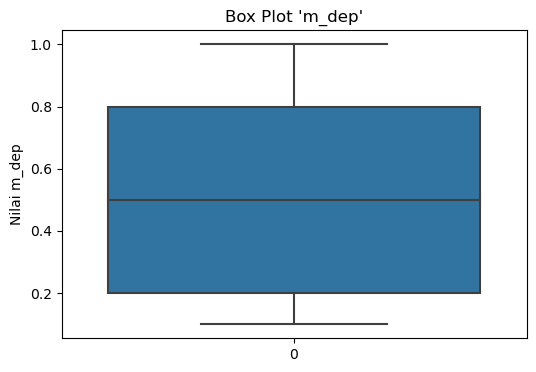


Distribusi Data untuk Kolom 'm_dep'


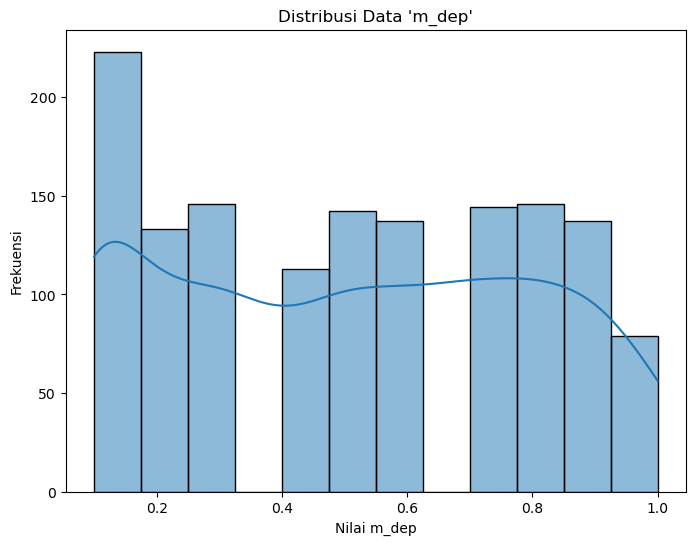


Analisis Kurtosis untuk Kolom 'm_dep'
Nilai kurtosis dari kolom 'm_dep': -1.2668226719440638
Kolom m_dep memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'm_dep' dengan Kolom Target 'price_range.'
Korelasi antara 'm_dep' dan 'price_range': 0.0012049180209845458


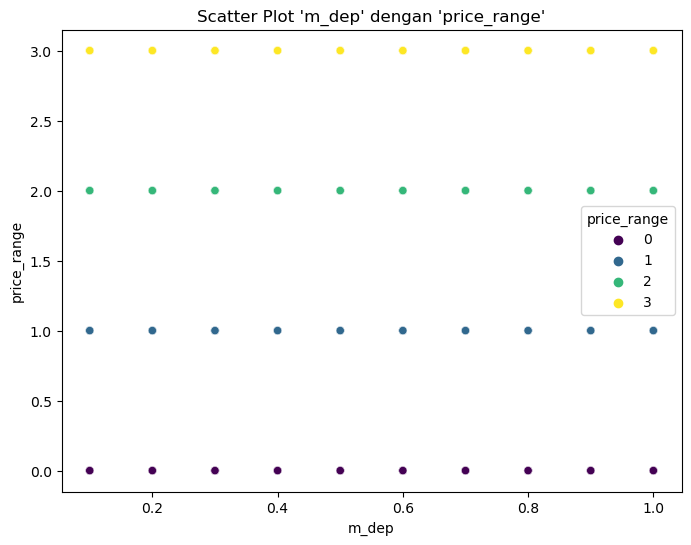

In [183]:
# Analisis Kolom m_dep
# m_dep: Ketebalan ponsel dalam cm
analyze_column_numeric(df, 'm_dep', 'price_range')


Statistika Dasar untuk Kolom 'mobile_wt'


,mobile_wt
Modus,182
Mean,139.375714
Median,139.000000
Standar Deviasi,35.400803
Variansi,1253.216851
Range,120
Max,200
Min,80
Quartile 1,108.000000
Quartile 2,139.000000



Duplicate Value untuk Kolom 'mobile_wt'
Terdapat 121 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,182,22,"[87, 117, 179, 253, 287, 361, 403, 470, 507, 549, 669, 703, 825, 915, 962, 985, 1008, 1105, 1198, 1296, 1333, 1397]"
1,105,21,"[2, 22, 170, 310, 349, 377, 378, 381, 547, 556, 677, 689, 735, 920, 1000, 1139, 1221, 1236, 1252, 1348, 1392]"
2,101,21,"[6, 49, 132, 207, 237, 263, 276, 362, 388, 431, 445, 558, 610, 641, 643, 674, 868, 876, 900, 947, 1090]"
3,198,20,"[26, 71, 192, 295, 553, 578, 582, 611, 615, 762, 790, 794, 839, 946, 1065, 1161, 1253, 1299, 1380, 1391]"
4,185,20,"[208, 236, 322, 345, 452, 577, 593, 670, 676, 693, 764, 804, 842, 1054, 1056, 1143, 1178, 1222, 1263, 1352]"
5,89,19,"[0, 27, 261, 459, 497, 737, 831, 847, 939, 1033, 1084, 1122, 1135, 1136, 1292, 1328, 1360, 1374, 1385]"
6,104,19,"[52, 112, 289, 354, 424, 530, 587, 706, 805, 826, 879, 1031, 1127, 1144, 1155, 1233, 1235, 1326, 1386]"
7,80,19,"[24, 99, 166, 220, 260, 407, 442, 448, 569, 619, 750, 815, 874, 917, 925, 1116, 1195, 1208, 1279]"
8,131,18,"[74, 102, 148, 268, 297, 423, 464, 484, 566, 695, 725, 801, 918, 1060, 1234, 1361, 1382, 1393]"
9,111,17,"[40, 146, 254, 255, 348, 358, 372, 567, 710, 713, 766, 1018, 1027, 1070, 1276, 1286, 1379]"



Missing Value untuk Kolom 'mobile_wt'
Tidak ada missing value pada kolom mobile_wt

Outliers untuk Kolom 'mobile_wt'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom mobile_wt

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom mobile_wt


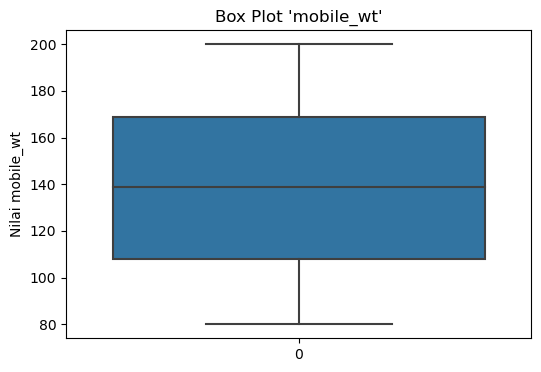


Distribusi Data untuk Kolom 'mobile_wt'


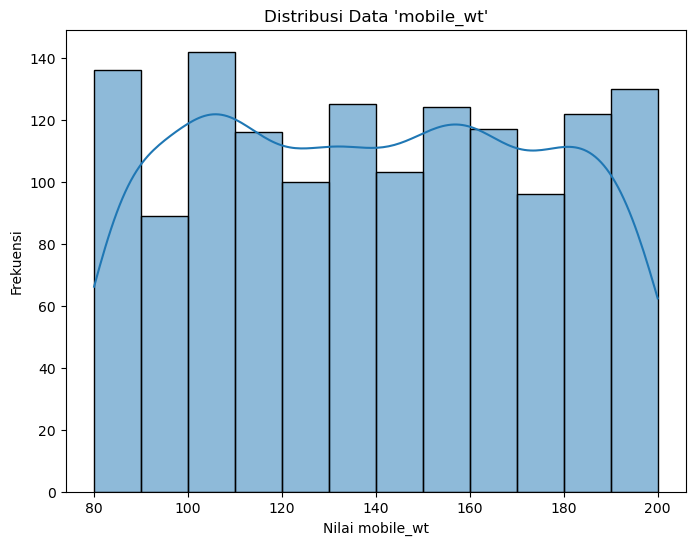


Analisis Kurtosis untuk Kolom 'mobile_wt'
Nilai kurtosis dari kolom 'mobile_wt': -1.210202007194779
Kolom mobile_wt memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'mobile_wt' dengan Kolom Target 'price_range.'
Korelasi antara 'mobile_wt' dan 'price_range': -0.07476875048323675


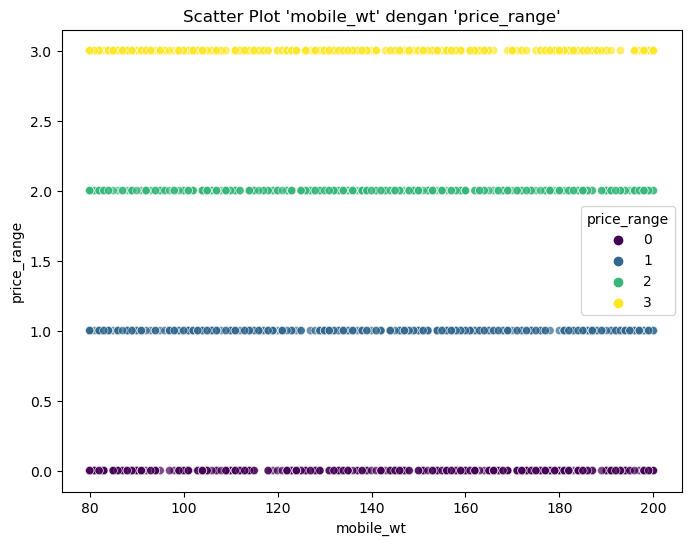

In [184]:
# Analisis Kolom mobile_wt
# mobile_wt: Berat ponsel
analyze_column_numeric(df, 'mobile_wt', 'price_range')


Statistika Dasar untuk Kolom 'n_cores'


,n_cores
Modus,4
Mean,4.481429
Median,4.000000
Standar Deviasi,2.279836
Variansi,5.197653
Range,7
Max,8
Min,1
Quartile 1,2.000000
Quartile 2,4.000000



Duplicate Value untuk Kolom 'n_cores'
Terdapat 8 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,4,198,"[11, 20, 26, 29, 31, 34, 43, 44, 53, 55, 57, 71, 79, 85, 87, 94, 95, 96, 97, 98, 119, 129, 130, 141, 142, 149, 150, 151, 153, 159, 163, 164, 166, 183, 186, 189, 193, 197, 205, 214, 247, 248, 263, 270, 276, 277, 296, 302, 307, 335, 342, 344, 362, 364, 373, 376, 382, 388, 403, 415, 447, 451, 458, 463, 469, 482, 490, 492, 493, 499, 503, 514, 516, 528, 530, 569, 570, 572, 574, 588, 599, 606, 609, 610, 612, 614, 619, 622, 629, 631, 642, 643, 648, 668, 674, 681, 698, 699, 701, 703, 709, 716, 718, 719, 726, 728, 737, 747, 748, 750, 758, 765, 772, 774, 776, 777, 778, 788, 800, 801, 805, 818, 837, 842, 854, 869, 871, 872, 880, 885, 892, 900, 903, 912, 921, 925, 928, 935, 937, 948, 970, 971, 981, 984, 988, 989, 994, 1003, 1014, 1016, 1031, 1042, 1044, 1048, 1062, 1066, 1070, 1097, 1102, 1135, 1137, 1139, 1144, 1145, 1160, 1170, 1171, 1182, 1187, 1188, 1189, 1200, 1203, 1207, 1217, 1218, 1231, 1233, 1235, 1243, 1258, 1262, 1264, 1268, 1270, 1277, 1279, 1286, 1295, 1298, 1324, 1340, 1343, 1349, 1357, 1367, 1382, 1391]"
1,7,189,"[10, 12, 16, 21, 30, 32, 45, 46, 51, 61, 69, 88, 104, 109, 110, 126, 128, 138, 143, 144, 157, 162, 170, 194, 198, 203, 212, 219, 222, 226, 240, 243, 245, 250, 251, 256, 262, 267, 271, 273, 283, 289, 301, 306, 309, 312, 324, 333, 336, 377, 386, 395, 397, 398, 400, 401, 404, 434, 435, 437, 438, 439, 442, 444, 445, 466, 470, 525, 526, 536, 547, 552, 561, 566, 568, 573, 576, 577, 585, 595, 602, 611, 613, 616, 623, 625, 628, 641, 644, 645, 647, 650, 657, 659, 672, 684, 689, 694, 705, 714, 721, 725, 730, 738, 739, 744, 749, 752, 753, 757, 760, 773, 787, 809, 820, 823, 825, 845, 852, 856, 860, 868, 890, 899, 909, 922, 923, 931, 934, 939, 944, 946, 961, 962, 972, 976, 983, 1013, 1017, 1018, 1021, 1027, 1039, 1051, 1054, 1114, 1118, 1130, 1131, 1147, 1164, 1165, 1166, 1168, 1176, 1180, 1183, 1190, 1192, 1193, 1196, 1197, 1202, 1212, 1225, 1236, 1247, 1252, 1261, 1267, 1269, 1288, 1294, 1302, 1306, 1315, 1320, 1326, 1330, 1339, 1356, 1372, 1377, 1378, 1385, 1386, 1392, 1393, 1396]"
2,2,183,"[3, 6, 15, 22, 28, 47, 58, 63, 67, 72, 76, 86, 105, 114, 118, 120, 122, 125, 134, 160, 176, 187, 200, 210, 213, 215, 234, 235, 236, 244, 254, 255, 261, 265, 281, 282, 288, 294, 299, 313, 321, 323, 328, 331, 339, 353, 371, 372, 393, 396, 402, 408, 419, 427, 429, 441, 457, 459, 461, 479, 483, 488, 495, 496, 500, 502, 509, 529, 539, 549, 554, 571, 580, 583, 589, 596, 597, 618, 621, 637, 655, 663, 664, 665, 667, 676, 687, 691, 704, 712, 713, 717, 732, 740, 742, 755, 761, 768, 785, 797, 798, 810, 811, 814, 816, 829, 832, 835, 840, 851, 857, 863, 865, 866, 879, 897, 901, 917, 926, 940, 942, 945, 955, 956, 959, 966, 974, 975, 987, 992, 1002, 1007, 1009, 1015, 1036, 1049, 1059, 1067, 1078, 1079, 1080, 1082, 1090, 1092, 1103, 1120, 1123, 1124, 1126, 1132, 1134, 1149, 1150, 1158, 1162, 1169, 1172, 1194, 1201, 1211, 1214, 1220, 1228, 1232, 1239, 1244, 1249, 1250, 1259, 1276, 1282, 1290, 1300, 1307, 1308, 1327, 1335, 1336, 1338, 1354, 1363, 1368, 1397]"
3,1,170,"[0, 7, 14, 27, 36, 37, 42, 65, 100, 101, 111, 113, 117, 124, 145, 152, 158, 161, 167, 168, 169, 181, 229, 231, 232, 237, 241, 252, 259, 287, 295, 303, 304, 317, 320, 327, 337, 338, 356, 365, 367, 391, 423, 425, 431, 448, 454, 456, 462, 464, 472, 480, 481, 498, 517, 527, 542, 543, 557, 575, 581, 582, 600, 601, 617, 632, 633, 649, 669, 673, 679, 683, 688, 690, 692, 696, 697, 707, 708, 722, 724, 733, 763, 764, 767, 771, 779, 799, 802, 812, 815, 819, 833, 838, 848, 853, 859, 873, 889, 894, 898, 904, 913, 919, 924, 927, 930, 933, 943, 949, 968, 969, 978, 985, 986, 991, 993, 1005, 1029, 1032, 1033, 1035, 1056, 1057, 1060, 1061, 1063, 1064, 1077, 1086, 1093, 1105, 1106, 1108, 1110, 1125, 1133, 1143, 1146, 1154, 1174, 1181, 1191, 1199, 1205, 1226, 1227, 1230, 1245, 1251, 1263, 1266, 1273, 1274, 1285, 1322, 1342, 1348, 1350, 1351, 1353, 1360, 1361, 1362, 1370, 1373, 1376, 1388, 1394, 1399]"
4,5,170,"[1, 5, 8, 35, 38, 62, 73, 91, 93, 99, 103, 106, 1


Missing Value untuk Kolom 'n_cores'
Tidak ada missing value pada kolom n_cores

Outliers untuk Kolom 'n_cores'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom n_cores

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom n_cores


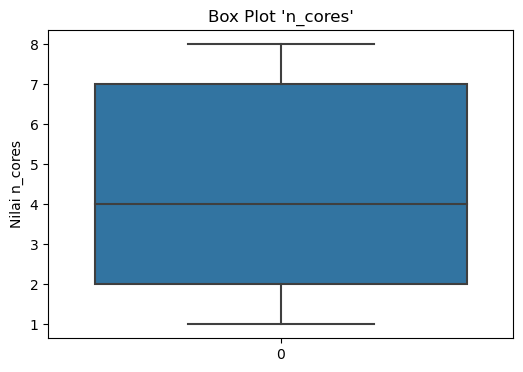


Distribusi Data untuk Kolom 'n_cores'


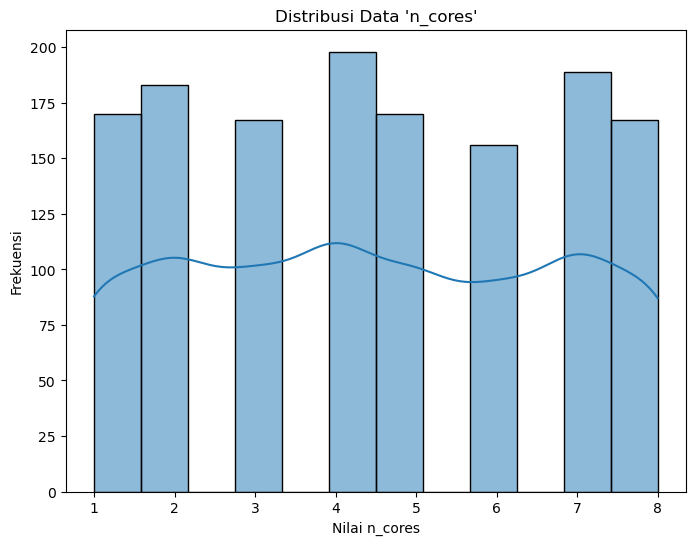


Analisis Kurtosis untuk Kolom 'n_cores'
Nilai kurtosis dari kolom 'n_cores': -1.2322085699401253
Kolom n_cores memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'n_cores' dengan Kolom Target 'price_range.'
Korelasi antara 'n_cores' dan 'price_range': -0.00058233062854524


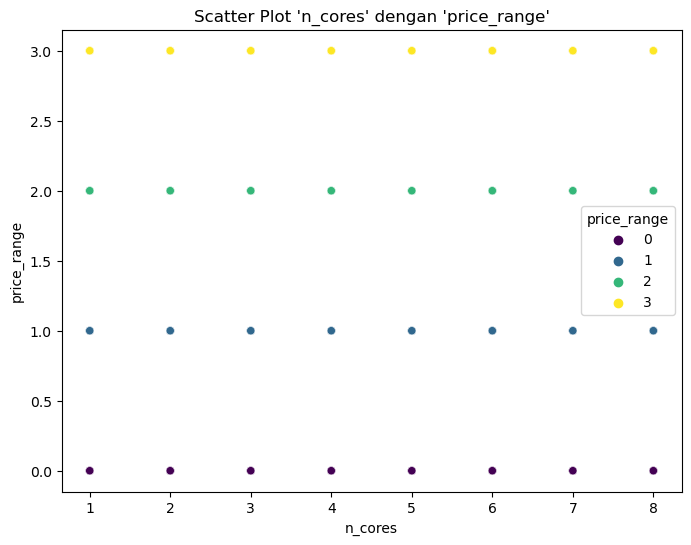

In [185]:
# Analisis Kolom n_cores
# n_cores: Jumlah core prosesor
analyze_column_numeric(df, 'n_cores', 'price_range')


Statistika Dasar untuk Kolom 'pc'


,pc
Modus,10
Mean,9.917143
Median,10.000000
Standar Deviasi,6.080023
Variansi,36.966682
Range,20
Max,20
Min,0
Quartile 1,5.000000
Quartile 2,10.000000



Duplicate Value untuk Kolom 'pc'
Terdapat 21 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,10,91,"[17, 24, 65, 67, 68, 79, 125, 128, 158, 168, 170, 176, 184, 228, 247, 255, 274, 283, 285, 291, 315, 316, 323, 331, 346, 360, 364, 399, 443, 449, 452, 509, 529, 546, 570, 595, 601, 612, 623, 676, 682, 684, 702, 713, 721, 745, 758, 766, 767, 776, 777, 799, 820, 864, 866, 867, 869, 878, 882, 920, 934, 942, 944, 945, 1005, 1032, 1049, 1051, 1068, 1069, 1073, 1082, 1100, 1104, 1107, 1114, 1123, 1137, 1143, 1197, 1214, 1219, 1227, 1235, 1271, 1276, 1300, 1328, 1329, 1347, 1349]"
1,7,87,"[12, 13, 33, 46, 62, 64, 88, 112, 131, 139, 171, 182, 191, 212, 233, 238, 244, 259, 278, 292, 294, 317, 320, 357, 367, 395, 401, 441, 485, 487, 489, 493, 513, 518, 520, 550, 551, 555, 557, 559, 561, 571, 575, 580, 630, 658, 659, 674, 714, 718, 726, 743, 756, 782, 853, 859, 874, 897, 928, 935, 948, 949, 954, 965, 969, 995, 1020, 1042, 1097, 1149, 1162, 1220, 1236, 1245, 1247, 1248, 1249, 1263, 1280, 1288, 1292, 1305, 1312, 1321, 1335, 1365, 1377]"
2,20,82,"[53, 55, 73, 98, 99, 103, 105, 118, 119, 136, 137, 154, 202, 204, 205, 245, 262, 276, 312, 366, 403, 409, 413, 429, 458, 469, 502, 544, 572, 573, 586, 603, 610, 632, 652, 673, 689, 699, 700, 711, 724, 755, 759, 778, 813, 819, 825, 844, 880, 885, 895, 903, 905, 927, 930, 936, 959, 971, 976, 984, 993, 1001, 1006, 1010, 1033, 1046, 1054, 1056, 1070, 1090, 1095, 1121, 1147, 1173, 1208, 1255, 1272, 1293, 1297, 1310, 1364, 1369]"
3,9,80,"[5, 6, 9, 63, 114, 116, 196, 218, 235, 242, 257, 265, 266, 272, 326, 353, 382, 386, 388, 391, 392, 393, 410, 454, 466, 484, 486, 488, 491, 497, 533, 537, 633, 641, 647, 651, 657, 666, 675, 686, 692, 728, 730, 754, 763, 796, 809, 821, 828, 873, 877, 888, 908, 912, 926, 939, 951, 953, 956, 967, 988, 991, 1016, 1030, 1038, 1136, 1142, 1163, 1252, 1302, 1306, 1317, 1332, 1336, 1340, 1345, 1354, 1363, 1383, 1398]"
4,2,74,"[4, 16, 21, 41, 48, 54, 90, 92, 178, 195, 203, 209, 236, 243, 250, 252, 261, 264, 269, 271, 299, 301, 305, 314, 417, 442, 460, 477, 528, 539, 552, 581, 582, 590, 645, 669, 670, 703, 712, 720, 748, 805, 812, 847, 876, 898, 917, 931, 972, 985, 997, 1013, 1021, 1024, 1026, 1027, 1043, 1089, 1122, 1124, 1139, 1161, 1212, 1240, 1254, 1269, 1279, 1285, 1291, 1325, 1357, 1359, 1367, 1387]"
5,14,72,"[18, 25, 30, 50, 80, 108, 109, 126, 129, 134, 138, 142, 143, 197, 214, 231, 329, 365, 371, 408, 432, 438, 464, 470, 514, 517, 577, 578, 608, 621, 634, 636, 655, 687, 695, 710, 727, 751, 881, 883, 884, 909, 929, 938, 940, 962, 1034, 1044, 1057, 1061, 1071, 1074, 1083, 1085, 1094, 1101, 1106, 1111, 1125, 1130, 1133, 1138, 1167, 1169, 1176, 1192, 1267, 1281, 1298, 1344, 1351, 1360]"
6,1,71,"[14, 27, 34, 81, 83, 121, 130, 148, 159, 165, 167, 173, 224, 248, 273, 337, 348, 359, 369, 439, 453, 457, 465, 496, 500, 515, 541, 558, 563, 566, 569, 585, 606, 614, 622, 644, 646, 691, 732, 739, 741, 774, 792, 808, 814, 826, 833, 870, 889, 911, 915, 937, 980, 982, 1014, 1039, 1103, 1116, 1119, 1152, 1155, 1160, 1182, 1185, 1223, 1224, 1233, 1277, 1323, 1338, 1366]"
7,0,70,"[2, 26, 61, 69, 87, 97, 144, 174, 216, 221, 234, 277, 280, 286, 319, 363, 373, 375, 397, 406, 419, 437, 468, 475, 476, 479, 503, 506, 535, 548, 554, 560, 564, 588, 624, 642, 661, 671, 697, 716, 719, 734, 787, 790, 795, 832, 841, 902, 904, 916, 974, 987, 1000, 1004, 1037, 1063, 1067, 1092, 1099, 1140, 1146, 1165, 1194, 1211, 1221, 1318, 1320, 1388, 1394, 1395]"
8,4,66,"[19, 22, 23, 84, 95, 133, 155, 164, 186, 201, 240, 298, 344, 378, 383, 389, 394, 420, 423, 431, 456, 463, 472, 478, 536, 639, 648, 653, 678, 696, 749, 752, 817, 835, 837, 861, 875, 879, 907, 966, 983, 1019, 1023, 1031, 1091, 1105, 1109, 1164, 1168, 1174, 1175, 1198, 1201, 1207, 1237, 1244, 1264, 1299, 1343, 1350, 1355, 1368, 1373, 1375, 1380, 1381]"
9,19,65,"[29, 39, 45, 51, 71, 96, 124, 183, 189, 190, 211, 213, 217, 239, 254, 260, 267, 282, 303, 311, 324, 343, 372, 385, 414, 416, 440, 446, 498, 522, 565, 583, 613, 616, 627, 685, 693, 705, 760, 784, 788, 800, 839, 952, 957, 1035, 1036, 1048, 1072, 1079


Missing Value untuk Kolom 'pc'
Tidak ada missing value pada kolom pc

Outliers untuk Kolom 'pc'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom pc

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom pc


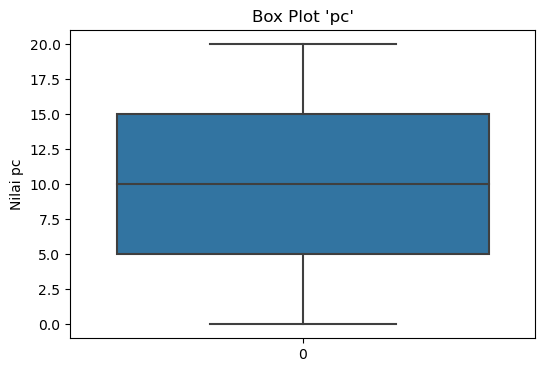


Distribusi Data untuk Kolom 'pc'


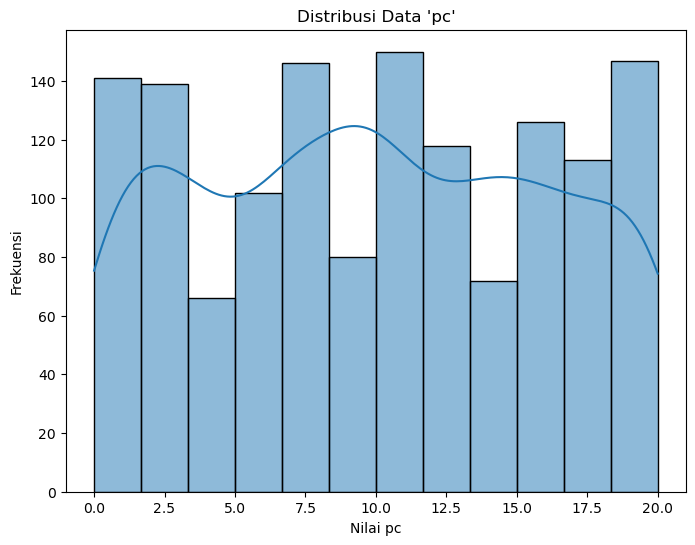


Analisis Kurtosis untuk Kolom 'pc'
Nilai kurtosis dari kolom 'pc': -1.1638760893853588
Kolom pc memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'pc' dengan Kolom Target 'price_range.'
Korelasi antara 'pc' dan 'price_range': -0.005214430491652996


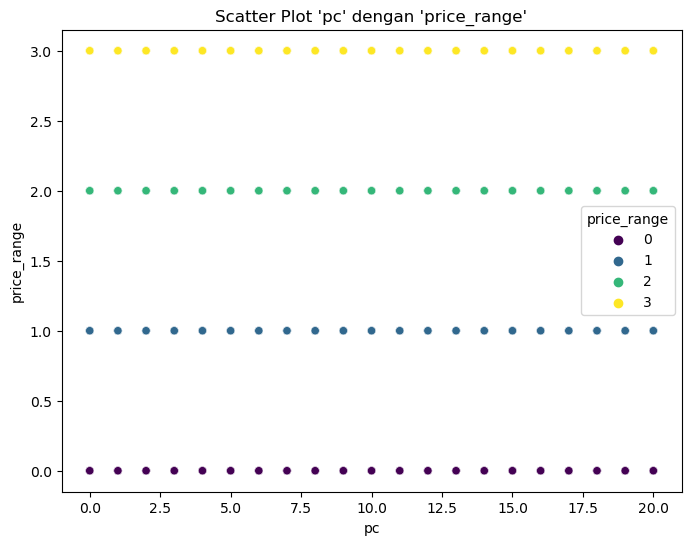

In [186]:
# Analisis Kolom pc
# pc: Resolusi kamera utama dalam megapiksel
analyze_column_numeric(df, 'pc', 'price_range')


Statistika Dasar untuk Kolom 'px_height'


,px_height
Modus,"88, 347, 526"
Mean,643.177857
Median,561.000000
Standar Deviasi,444.628980
Variansi,197694.929745
Range,1960
Max,1960
Min,0
Quartile 1,273.750000
Quartile 2,561.000000



Duplicate Value untuk Kolom 'px_height'
Terdapat 348 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,347,5,"[657, 983, 1164, 1266, 1284]"
1,88,5,"[30, 143, 642, 1062, 1085]"
2,526,5,"[454, 540, 727, 821, 1277]"
3,730,4,"[111, 388, 508, 927]"
4,140,4,"[372, 379, 1096, 1179]"
5,217,4,"[58, 295, 585, 709]"
6,447,4,"[518, 1126, 1203, 1393]"
7,831,4,"[70, 953, 1298, 1347]"
8,632,4,"[71, 452, 489, 528]"
9,322,4,"[326, 806, 832, 998]"



Missing Value untuk Kolom 'px_height'
Tidak ada missing value pada kolom px_height

Outliers untuk Kolom 'px_height'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom px_height

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom px_height


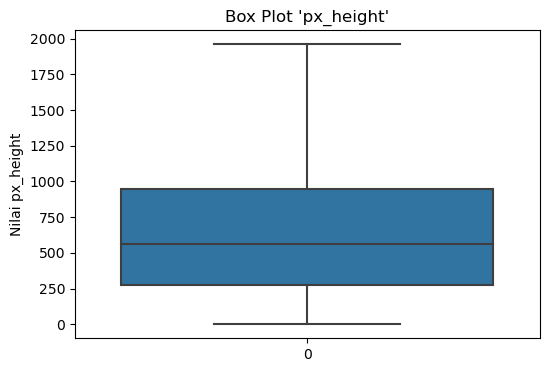


Distribusi Data untuk Kolom 'px_height'


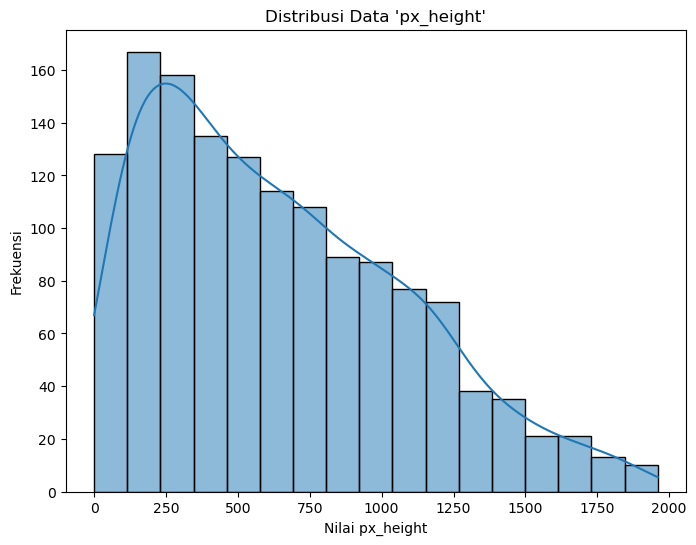


Analisis Kurtosis untuk Kolom 'px_height'
Nilai kurtosis dari kolom 'px_height': -0.3162286486894521
Kolom px_height memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'px_height' dengan Kolom Target 'price_range.'
Korelasi antara 'px_height' dan 'price_range': 0.15883273548307997


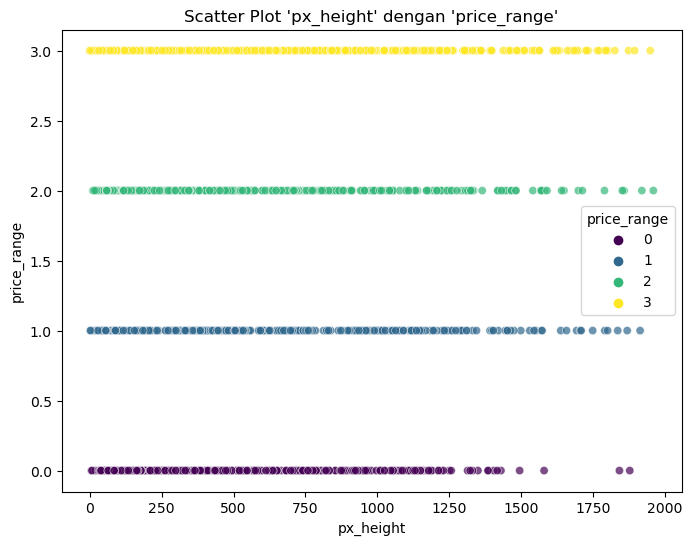

In [187]:
# Analisis Kolom px_height
# px_height: Tinggi resolusi piksel
analyze_column_numeric(df, 'px_height', 'price_range')


Statistika Dasar untuk Kolom 'px_width'


,px_width
Modus,1247
Mean,1251.717143
Median,1247.000000
Standar Deviasi,428.982850
Variansi,184026.285910
Range,1498
Max,1998
Min,500
Quartile 1,876.500000
Quartile 2,1247.000000



Duplicate Value untuk Kolom 'px_width'
Terdapat 364 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,1247,6,"[514, 836, 1122, 1341, 1354, 1363]"
1,1463,5,"[145, 222, 380, 871, 1222]"
2,1234,5,"[129, 134, 520, 624, 1260]"
3,1923,5,"[669, 750, 767, 795, 1097]"
4,882,4,"[93, 260, 791, 1172]"
5,1759,4,"[63, 158, 368, 792]"
6,1670,4,"[552, 732, 1105, 1309]"
7,1011,4,"[65, 825, 848, 1327]"
8,1564,4,"[572, 743, 1071, 1329]"
9,891,4,"[330, 399, 703, 758]"



Missing Value untuk Kolom 'px_width'
Tidak ada missing value pada kolom px_width

Outliers untuk Kolom 'px_width'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom px_width

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom px_width


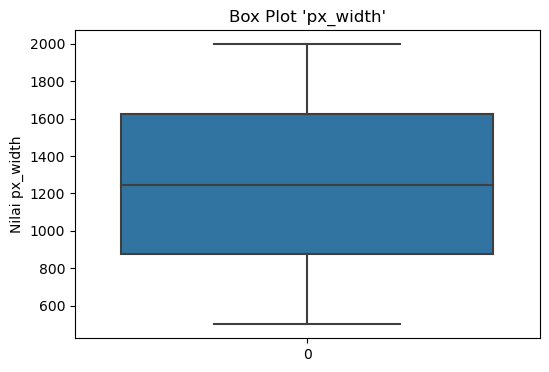


Distribusi Data untuk Kolom 'px_width'


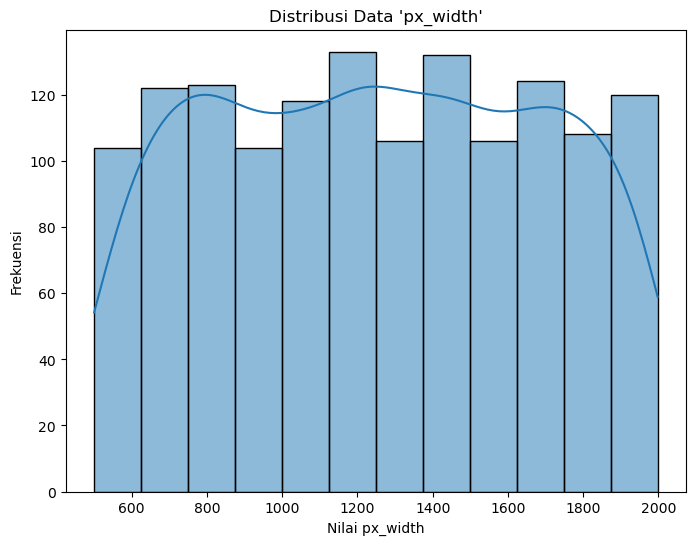


Analisis Kurtosis untuk Kolom 'px_width'
Nilai kurtosis dari kolom 'px_width': -1.1760245181224622
Kolom px_width memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'px_width' dengan Kolom Target 'price_range.'
Korelasi antara 'px_width' dan 'price_range': 0.17871269011026597


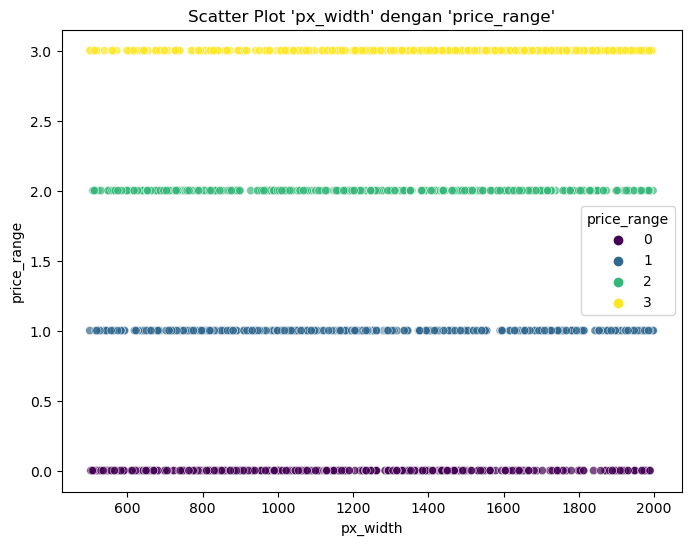

In [188]:
# Analisis Kolom px_width
# px_width: Lebar resolusi piksel
analyze_column_numeric(df, 'px_width', 'price_range')


Statistika Dasar untuk Kolom 'ram'


,ram
Modus,"1229, 3142"
Mean,2106.731429
Median,2102.000000
Standar Deviasi,1078.347277
Variansi,1162832.849905
Range,3742
Max,3998
Min,256
Quartile 1,1201.000000
Quartile 2,2102.000000



Duplicate Value untuk Kolom 'ram'
Terdapat 202 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,1229,4,"[3, 62, 262, 1024]"
1,3142,4,"[834, 992, 1192, 1266]"
2,595,3,"[305, 583, 814]"
3,2190,3,"[346, 1003, 1049]"
4,2107,3,"[341, 476, 900]"
5,2678,3,"[130, 649, 1387]"
6,3865,3,"[568, 1214, 1230]"
7,1303,3,"[590, 1143, 1304]"
8,1974,3,"[143, 351, 570]"
9,3488,3,"[161, 241, 629]"



Missing Value untuk Kolom 'ram'
Tidak ada missing value pada kolom ram

Outliers untuk Kolom 'ram'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom ram

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom ram


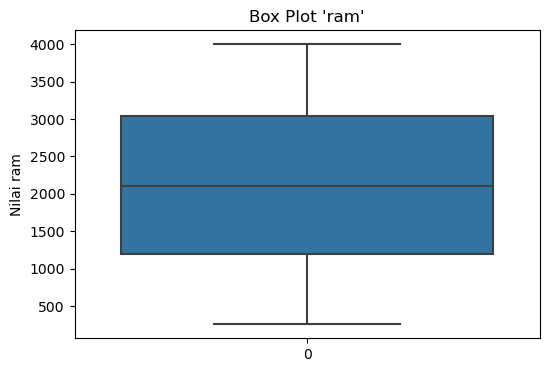


Distribusi Data untuk Kolom 'ram'


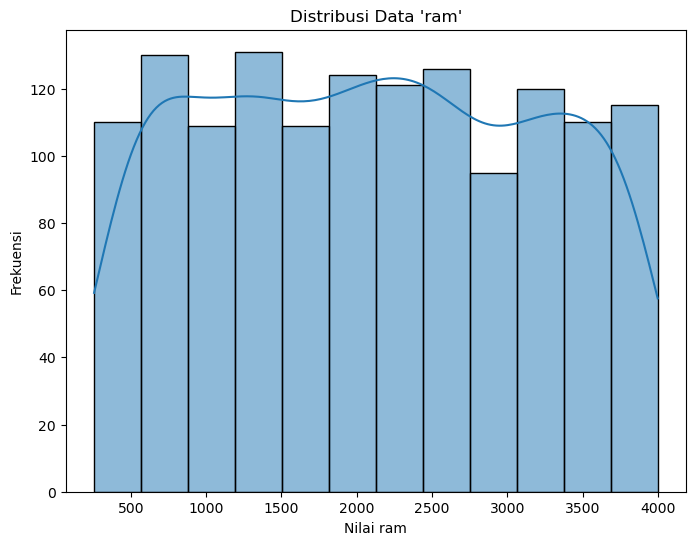


Analisis Kurtosis untuk Kolom 'ram'
Nilai kurtosis dari kolom 'ram': -1.1861412453532745
Kolom ram memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'ram' dengan Kolom Target 'price_range.'
Korelasi antara 'ram' dan 'price_range': 0.9183192307843856


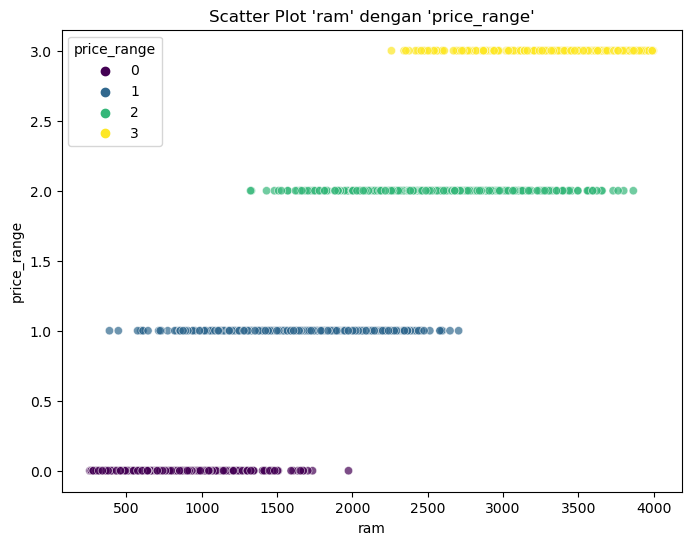

In [189]:
# Analisis Kolom ram
# ram: Ukuran RAM dalam megabyte
analyze_column_numeric(df, 'ram', 'price_range')


Statistika Dasar untuk Kolom 'sc_h'


,sc_h
Modus,17
Mean,12.285714
Median,12.000000
Standar Deviasi,4.204198
Variansi,17.675278
Range,14
Max,19
Min,5
Quartile 1,9.000000
Quartile 2,12.000000



Duplicate Value untuk Kolom 'sc_h'
Terdapat 15 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,17,134,"[2, 29, 73, 76, 86, 90, 105, 109, 124, 133, 136, 143, 155, 156, 163, 165, 167, 169, 170, 184, 190, 201, 215, 222, 233, 240, 244, 248, 288, 289, 299, 311, 312, 332, 333, 355, 360, 367, 386, 394, 395, 397, 406, 418, 420, 440, 456, 467, 469, 471, 479, 502, 505, 511, 516, 526, 537, 541, 556, 580, 596, 601, 620, 624, 627, 635, 639, 647, 668, 685, 704, 733, 750, 752, 757, 765, 790, 799, 808, 809, 841, 864, 873, 876, 888, 891, 898, 902, 907, 909, 923, 927, 948, 971, 975, 987, 997, 1002, 1007, 1032, 1037, 1051, 1082, 1085, 1086, 1092, 1109, 1113, 1127, 1157, 1162, 1164, 1167, 1170, 1196, 1210, 1246, 1257, 1286, 1287, 1289, 1290, 1297, 1304, 1309, 1313, 1331, 1332, 1347, 1370, 1374, 1378, 1389, 1393]"
1,7,108,"[14, 18, 33, 75, 101, 106, 118, 119, 159, 172, 178, 179, 219, 221, 226, 229, 277, 307, 316, 319, 325, 327, 339, 353, 359, 363, 364, 378, 383, 388, 398, 399, 435, 445, 458, 482, 504, 506, 518, 519, 534, 543, 545, 548, 563, 569, 587, 612, 626, 657, 661, 666, 677, 683, 688, 691, 700, 720, 722, 723, 725, 731, 763, 772, 793, 794, 804, 815, 832, 842, 843, 871, 890, 946, 951, 963, 983, 1005, 1010, 1028, 1036, 1054, 1057, 1058, 1065, 1073, 1087, 1089, 1093, 1099, 1136, 1137, 1153, 1174, 1193, 1207, 1229, 1268, 1275, 1292, 1298, 1315, 1321, 1330, 1345, 1357, 1362, 1391]"
2,12,107,"[6, 11, 37, 38, 45, 62, 77, 97, 127, 135, 147, 151, 153, 154, 198, 205, 210, 218, 234, 247, 252, 264, 276, 292, 302, 324, 344, 347, 351, 375, 380, 387, 404, 419, 425, 428, 442, 443, 474, 475, 477, 515, 517, 527, 528, 540, 555, 571, 585, 591, 610, 616, 625, 644, 654, 658, 671, 681, 682, 684, 693, 707, 712, 737, 748, 751, 779, 782, 785, 787, 851, 857, 858, 934, 939, 955, 962, 965, 977, 993, 1006, 1077, 1091, 1100, 1102, 1116, 1117, 1132, 1143, 1149, 1152, 1158, 1161, 1186, 1198, 1230, 1234, 1259, 1262, 1282, 1291, 1294, 1319, 1327, 1328, 1392, 1394]"
3,14,100,"[5, 21, 25, 27, 34, 46, 57, 68, 74, 85, 117, 129, 142, 157, 181, 231, 237, 241, 246, 251, 260, 266, 281, 285, 308, 313, 343, 369, 424, 468, 478, 498, 499, 501, 513, 547, 549, 558, 561, 570, 586, 588, 605, 606, 619, 631, 641, 651, 664, 706, 709, 741, 764, 768, 770, 776, 780, 796, 807, 819, 825, 846, 865, 870, 880, 886, 899, 903, 906, 926, 930, 943, 949, 950, 972, 984, 1011, 1018, 1046, 1112, 1121, 1131, 1138, 1142, 1146, 1147, 1156, 1176, 1195, 1197, 1242, 1299, 1305, 1314, 1346, 1351, 1376, 1386, 1390, 1398]"
4,15,100,"[7, 19, 23, 41, 47, 65, 102, 104, 121, 148, 160, 166, 171, 188, 197, 203, 213, 232, 235, 238, 259, 283, 328, 336, 337, 366, 401, 413, 426, 431, 446, 454, 459, 461, 465, 476, 480, 485, 539, 542, 551, 562, 567, 581, 584, 592, 597, 621, 642, 653, 662, 678, 710, 730, 734, 735, 736, 753, 810, 821, 830, 833, 852, 861, 916, 917, 937, 938, 947, 986, 990, 994, 998, 1004, 1015, 1029, 1047, 1050, 1060, 1062, 1069, 1079, 1129, 1133, 1148, 1154, 1169, 1181, 1189, 1194, 1209, 1236, 1238, 1302, 1303, 1318, 1334, 1358, 1395, 1396]"
5,16,99,"[8, 49, 53, 55, 59, 60, 61, 64, 70, 100, 130, 141, 146, 173, 174, 177, 195, 202, 225, 249, 272, 318, 346, 356, 358, 368, 370, 405, 408, 427, 463, 473, 484, 492, 494, 509, 520, 522, 535, 536, 594, 609, 623, 628, 629, 645, 648, 656, 680, 699, 716, 742, 746, 754, 758, 777, 781, 788, 806, 827, 828, 834, 840, 885, 901, 908, 921, 964, 1023, 1024, 1038, 1049, 1061, 1070, 1090, 1103, 1120, 1128, 1134, 1150, 1168, 1175, 1204, 1208, 1232, 1243, 1264, 1265, 1296, 1316, 1317, 1322, 1325, 1341, 1355, 1360, 1364, 1368, 1397]"
6,13,95,"[13, 17, 30, 31, 99, 113, 134, 230, 239, 245, 270, 273, 279, 303, 304, 317, 320, 321, 338, 341, 361, 381, 384, 391, 393, 396, 429, 441, 472, 488, 496, 554, 576, 589, 611, 634, 660, 674, 698, 711, 728, 812, 826, 829, 831, 835, 848, 862, 867, 869, 879, 881, 882, 887, 913, 918, 932, 942, 958, 960, 982, 991, 1030, 1048, 1066, 1072, 1074, 1095, 1104, 1119, 1135, 1141, 1151, 1188, 1191, 1203, 1205, 1247, 1252, 1256, 1258, 1266, 1270, 1276, 1280, 1308, 1310, 1336, 1337, 1340, 1343, 1359, 1371, 1380, 1382]"
7,


Missing Value untuk Kolom 'sc_h'
Tidak ada missing value pada kolom sc_h

Outliers untuk Kolom 'sc_h'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom sc_h

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom sc_h


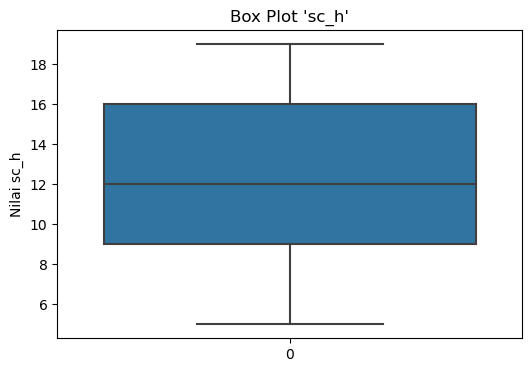


Distribusi Data untuk Kolom 'sc_h'


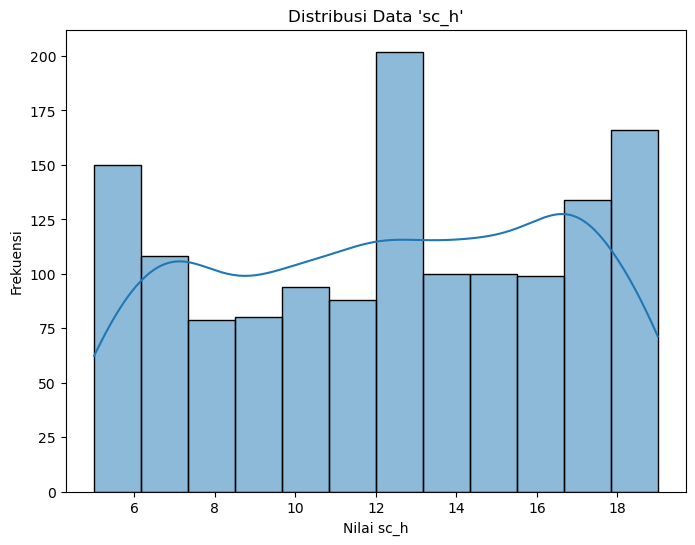


Analisis Kurtosis untuk Kolom 'sc_h'
Nilai kurtosis dari kolom 'sc_h': -1.183273418204271
Kolom sc_h memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'sc_h' dengan Kolom Target 'price_range.'
Korelasi antara 'sc_h' dan 'price_range': 0.012148883173075034


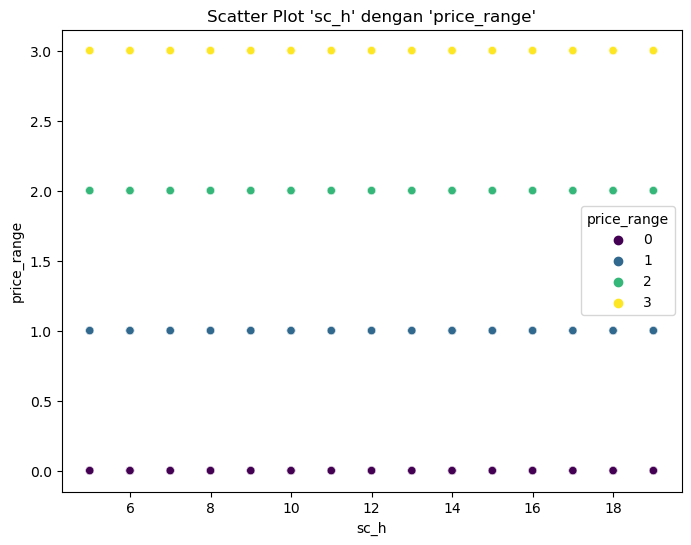

In [190]:
# Analisis Kolom sc_h
# sc_h: Tinggi layar ponsel dalam cm
analyze_column_numeric(df, 'sc_h', 'price_range')


Statistika Dasar untuk Kolom 'sc_w'


,sc_w
Modus,1
Mean,5.665000
Median,5.000000
Standar Deviasi,4.372234
Variansi,19.116430
Range,18
Max,18
Min,0
Quartile 1,2.000000
Quartile 2,5.000000



Duplicate Value untuk Kolom 'sc_w'
Terdapat 19 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,1,151,"[19, 23, 54, 63, 64, 67, 68, 69, 75, 85, 87, 110, 121, 125, 140, 153, 164, 175, 183, 185, 192, 197, 199, 218, 227, 243, 258, 261, 263, 270, 287, 291, 299, 301, 306, 307, 311, 312, 313, 316, 328, 359, 367, 384, 402, 410, 411, 437, 446, 461, 470, 488, 490, 491, 495, 536, 544, 545, 560, 569, 570, 579, 587, 591, 593, 595, 606, 613, 614, 640, 642, 672, 683, 691, 694, 701, 707, 711, 712, 715, 723, 742, 761, 762, 788, 791, 797, 804, 805, 815, 822, 825, 838, 849, 854, 881, 883, 902, 908, 909, 924, 928, 932, 939, 941, 957, 963, 970, 976, 984, 988, 997, 999, 1000, 1001, 1003, 1009, 1026, 1030, 1036, 1080, 1083, 1085, 1096, 1101, 1115, 1121, 1206, 1212, 1218, 1223, 1243, 1245, 1248, 1250, 1260, 1277, 1284, 1285, 1290, 1298, 1301, 1320, 1321, 1336, 1337, 1338, 1359, 1367, 1391, 1393]"
1,3,144,"[12, 14, 15, 24, 33, 35, 36, 39, 57, 76, 95, 98, 99, 102, 126, 162, 178, 187, 200, 206, 216, 223, 224, 226, 230, 241, 252, 262, 265, 279, 286, 296, 318, 327, 334, 335, 339, 349, 357, 364, 370, 371, 374, 376, 392, 394, 399, 400, 404, 425, 430, 433, 434, 444, 452, 458, 460, 465, 466, 475, 505, 541, 577, 584, 612, 639, 648, 651, 666, 673, 678, 687, 692, 716, 727, 731, 734, 738, 792, 793, 794, 802, 820, 840, 847, 858, 860, 868, 877, 879, 912, 915, 921, 925, 930, 933, 953, 958, 961, 969, 972, 979, 983, 985, 990, 992, 994, 1014, 1043, 1045, 1054, 1064, 1088, 1092, 1095, 1107, 1114, 1123, 1133, 1135, 1137, 1139, 1143, 1144, 1154, 1171, 1184, 1202, 1205, 1207, 1214, 1226, 1235, 1253, 1265, 1267, 1273, 1276, 1293, 1303, 1309, 1356, 1374, 1375]"
2,0,137,"[1, 3, 10, 20, 22, 26, 37, 40, 55, 56, 62, 83, 86, 106, 119, 120, 128, 137, 144, 182, 190, 213, 229, 254, 272, 277, 278, 280, 281, 284, 297, 303, 323, 324, 332, 345, 348, 363, 365, 388, 407, 417, 428, 438, 439, 442, 451, 486, 487, 496, 507, 518, 519, 529, 564, 583, 622, 638, 647, 650, 664, 689, 697, 718, 730, 757, 779, 780, 784, 790, 801, 814, 830, 832, 839, 844, 845, 871, 874, 885, 895, 904, 911, 918, 931, 978, 993, 1004, 1039, 1046, 1053, 1057, 1058, 1070, 1077, 1090, 1098, 1103, 1108, 1109, 1113, 1156, 1157, 1159, 1174, 1177, 1180, 1181, 1193, 1196, 1201, 1204, 1208, 1213, 1221, 1222, 1225, 1228, 1233, 1254, 1258, 1259, 1261, 1264, 1266, 1272, 1274, 1281, 1283, 1292, 1294, 1296, 1324, 1339, 1349, 1370, 1387]"
3,4,136,"[5, 7, 25, 28, 29, 42, 47, 50, 70, 71, 79, 80, 96, 101, 107, 111, 112, 114, 118, 122, 135, 149, 150, 157, 159, 161, 170, 172, 176, 180, 194, 214, 221, 234, 236, 239, 240, 242, 256, 274, 289, 290, 293, 305, 325, 330, 331, 340, 377, 379, 383, 412, 445, 455, 473, 481, 483, 500, 510, 531, 532, 534, 546, 547, 548, 549, 573, 575, 590, 596, 602, 615, 633, 634, 636, 643, 646, 649, 667, 681, 682, 695, 703, 721, 759, 767, 786, 817, 826, 837, 846, 853, 855, 863, 886, 887, 890, 893, 897, 919, 929, 943, 960, 989, 991, 998, 1005, 1010, 1025, 1035, 1056, 1111, 1131, 1136, 1140, 1141, 1149, 1160, 1163, 1167, 1175, 1186, 1192, 1219, 1224, 1282, 1306, 1310, 1315, 1328, 1342, 1345, 1357, 1377, 1388, 1389]"
4,5,108,"[0, 9, 18, 72, 123, 130, 134, 139, 143, 147, 193, 217, 237, 245, 249, 250, 253, 269, 282, 294, 304, 310, 315, 319, 329, 337, 352, 353, 378, 386, 390, 395, 398, 415, 424, 432, 441, 462, 464, 477, 493, 523, 537, 550, 551, 559, 561, 563, 598, 608, 611, 618, 654, 657, 661, 669, 674, 690, 700, 710, 713, 735, 756, 770, 806, 807, 823, 836, 884, 892, 894, 900, 938, 947, 980, 996, 1019, 1040, 1041, 1063, 1072, 1089, 1091, 1097, 1099, 1104, 1152, 1153, 1169, 1172, 1176, 1185, 1187, 1229, 1242, 1268, 1269, 1275, 1280, 1312, 1327, 1330, 1332, 1353, 1362, 1368, 1380, 1397]"
5,2,104,"[6, 53, 59, 65, 74, 81, 88, 93, 108, 115, 173, 179, 196, 198, 202, 222, 228, 238, 259, 266, 408, 440, 447, 450, 478, 482, 504, 511, 512, 527, 528, 533, 540, 552, 567, 572, 574, 589, 599, 600, 604, 610, 620, 629, 652, 655, 670, 677, 688, 706, 719, 720, 729, 732, 740, 751, 763, 768, 769, 772, 773, 775, 778, 782, 783, 798, 818, 843, 866, 889, 914, 955, 956, 967, 981, 995, 1006, 1020, 


Missing Value untuk Kolom 'sc_w'
Tidak ada missing value pada kolom sc_w

Outliers untuk Kolom 'sc_w'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom sc_w

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom sc_w


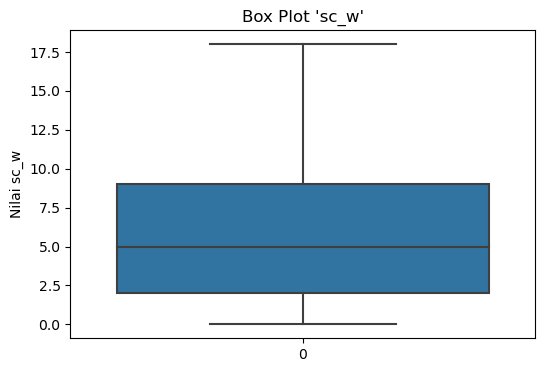


Distribusi Data untuk Kolom 'sc_w'


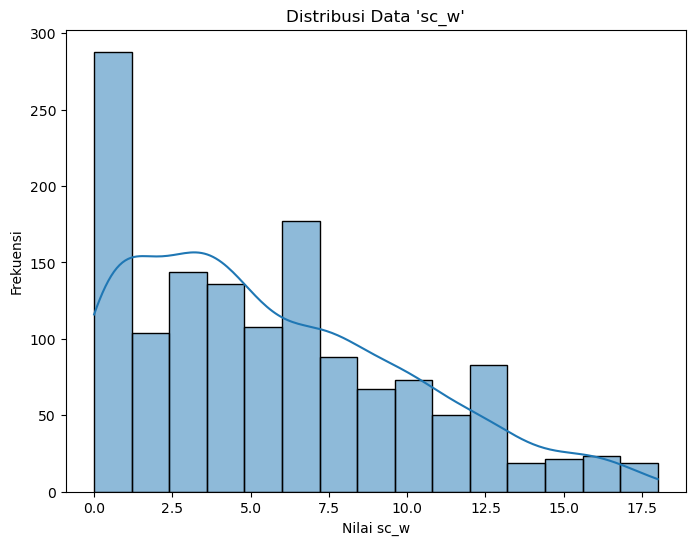


Analisis Kurtosis untuk Kolom 'sc_w'
Nilai kurtosis dari kolom 'sc_w': -0.3346408708969695
Kolom sc_w memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'sc_w' dengan Kolom Target 'price_range.'
Korelasi antara 'sc_w' dan 'price_range': 0.019911698810365103


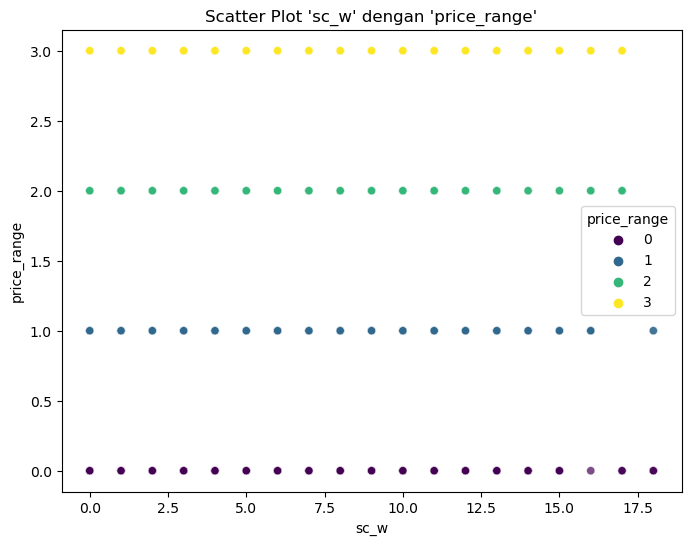

In [191]:
# Analisis Kolom sc_w
# sc_w: Lebar layar ponsel dalam cm
analyze_column_numeric(df, 'sc_w', 'price_range')


Statistika Dasar untuk Kolom 'talk_time'


,talk_time
Modus,15
Mean,11.042143
Median,11.000000
Standar Deviasi,5.399052
Variansi,29.149760
Range,18
Max,20
Min,2
Quartile 1,6.000000
Quartile 2,11.000000



Duplicate Value untuk Kolom 'talk_time'
Terdapat 19 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,15,86,"[64, 75, 89, 90, 108, 157, 174, 180, 193, 242, 270, 281, 287, 295, 299, 300, 305, 307, 320, 350, 377, 421, 430, 435, 444, 450, 455, 472, 480, 494, 496, 502, 503, 513, 523, 567, 573, 585, 591, 597, 601, 618, 620, 631, 655, 658, 670, 674, 678, 683, 686, 687, 695, 733, 741, 742, 744, 754, 765, 801, 832, 839, 842, 853, 860, 873, 980, 984, 1011, 1056, 1080, 1094, 1127, 1131, 1153, 1160, 1180, 1200, 1202, 1210, 1219, 1235, 1323, 1339, 1380, 1399]"
1,16,82,"[9, 68, 69, 81, 84, 118, 133, 155, 177, 204, 219, 265, 269, 314, 316, 346, 387, 396, 410, 417, 419, 426, 427, 428, 446, 469, 483, 514, 548, 549, 619, 630, 647, 654, 673, 689, 694, 725, 732, 751, 781, 787, 795, 824, 826, 882, 900, 902, 911, 917, 954, 970, 986, 994, 1027, 1030, 1035, 1071, 1085, 1111, 1117, 1142, 1145, 1158, 1181, 1223, 1231, 1240, 1258, 1274, 1275, 1286, 1308, 1310, 1311, 1330, 1358, 1363, 1367, 1379, 1394, 1397]"
2,4,81,"[2, 18, 57, 63, 78, 95, 126, 128, 134, 150, 167, 200, 202, 213, 214, 230, 238, 262, 279, 288, 298, 328, 340, 356, 375, 413, 415, 416, 432, 433, 473, 498, 510, 536, 545, 554, 559, 582, 640, 699, 721, 736, 777, 788, 798, 851, 918, 919, 920, 927, 933, 934, 952, 958, 962, 976, 991, 1006, 1017, 1020, 1022, 1040, 1049, 1061, 1099, 1120, 1122, 1137, 1159, 1197, 1209, 1246, 1279, 1280, 1304, 1312, 1314, 1344, 1376, 1389, 1391]"
3,7,81,"[21, 23, 28, 66, 88, 107, 123, 131, 139, 152, 159, 166, 188, 195, 198, 254, 259, 289, 331, 389, 411, 420, 445, 448, 453, 460, 464, 466, 491, 497, 500, 501, 505, 506, 535, 556, 566, 569, 589, 596, 602, 603, 605, 646, 650, 663, 677, 692, 712, 719, 779, 819, 841, 977, 1016, 1058, 1064, 1092, 1100, 1114, 1150, 1155, 1161, 1166, 1191, 1206, 1212, 1214, 1250, 1296, 1301, 1302, 1319, 1325, 1331, 1333, 1338, 1364, 1378, 1384, 1395]"
4,19,80,"[52, 110, 111, 125, 148, 187, 208, 221, 233, 240, 280, 304, 335, 343, 362, 370, 394, 400, 405, 422, 436, 440, 461, 474, 543, 563, 574, 583, 617, 626, 634, 666, 671, 676, 700, 710, 734, 748, 773, 784, 790, 805, 813, 855, 874, 875, 891, 957, 959, 964, 973, 983, 1002, 1004, 1012, 1023, 1046, 1076, 1089, 1107, 1139, 1152, 1154, 1164, 1172, 1192, 1195, 1208, 1222, 1255, 1265, 1276, 1282, 1305, 1359, 1362, 1365, 1368, 1383, 1392]"
5,8,79,"[11, 14, 15, 19, 39, 50, 53, 58, 67, 72, 79, 100, 142, 154, 160, 206, 229, 245, 255, 272, 306, 309, 318, 330, 342, 359, 364, 366, 384, 392, 393, 397, 414, 456, 524, 572, 604, 612, 621, 635, 722, 723, 738, 756, 761, 817, 835, 837, 863, 880, 883, 901, 949, 963, 965, 966, 997, 1010, 1015, 1019, 1029, 1041, 1066, 1083, 1104, 1118, 1140, 1156, 1179, 1194, 1203, 1205, 1234, 1248, 1263, 1270, 1295, 1321, 1387]"
6,9,78,"[4, 80, 103, 119, 147, 149, 164, 165, 170, 201, 223, 256, 268, 354, 361, 380, 390, 407, 408, 423, 425, 431, 470, 475, 478, 499, 517, 525, 550, 553, 562, 616, 653, 696, 770, 772, 780, 815, 831, 847, 861, 877, 885, 903, 907, 929, 930, 932, 937, 948, 967, 982, 985, 1003, 1013, 1033, 1037, 1042, 1051, 1062, 1146, 1162, 1165, 1168, 1176, 1178, 1201, 1207, 1244, 1254, 1273, 1294, 1306, 1313, 1354, 1360, 1369, 1374]"
7,12,78,"[30, 31, 34, 40, 94, 96, 116, 122, 124, 127, 227, 231, 250, 263, 275, 277, 278, 312, 315, 324, 326, 341, 349, 351, 355, 371, 382, 438, 459, 479, 507, 509, 526, 537, 542, 580, 623, 668, 697, 714, 743, 757, 769, 793, 809, 811, 849, 864, 872, 889, 928, 969, 975, 999, 1005, 1028, 1047, 1048, 1050, 1052, 1053, 1060, 1072, 1077, 1129, 1167, 1211, 1227, 1238, 1242, 1256, 1257, 1277, 1337, 1352, 1371, 1396, 1398]"
8,18,77,"[17, 45, 55, 59, 60, 137, 144, 172, 181, 212, 222, 261, 266, 282, 290, 294, 311, 337, 345, 368, 376, 383, 385, 403, 406, 409, 486, 519, 530, 570, 571, 575, 577, 599, 600, 627, 652, 657, 662, 675, 706, 708, 709, 711, 713, 776, 854, 858, 881, 888, 904, 915, 942, 953, 960, 1014, 1038, 1069, 1091, 1126, 1133, 1170, 1175, 1184, 1198, 1224, 1228, 1229, 1230, 1232, 1268, 1281, 1291, 1298, 1345, 1372, 1373]"
9,14,77,"[5, 6, 36, 46, 51, 54, 62, 85, 99, 104, 114, 117, 162, 173, 186, 215, 2


Missing Value untuk Kolom 'talk_time'
Tidak ada missing value pada kolom talk_time

Outliers untuk Kolom 'talk_time'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom talk_time

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom talk_time


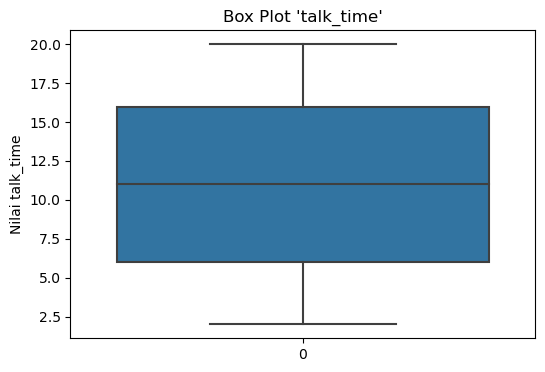


Distribusi Data untuk Kolom 'talk_time'


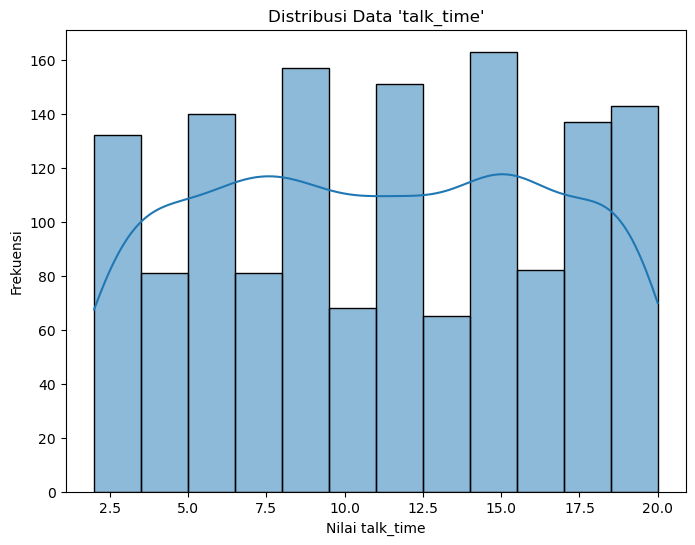


Analisis Kurtosis untuk Kolom 'talk_time'
Nilai kurtosis dari kolom 'talk_time': -1.1920181405410146
Kolom talk_time memiliki jenis kurtosis platikurtis, yaitu distribusi lebih landai atau lebih tumpul dibandingkan terhadap distribusi normal.

Korelasi 'talk_time' dengan Kolom Target 'price_range.'
Korelasi antara 'talk_time' dan 'price_range': 0.011112731754754968


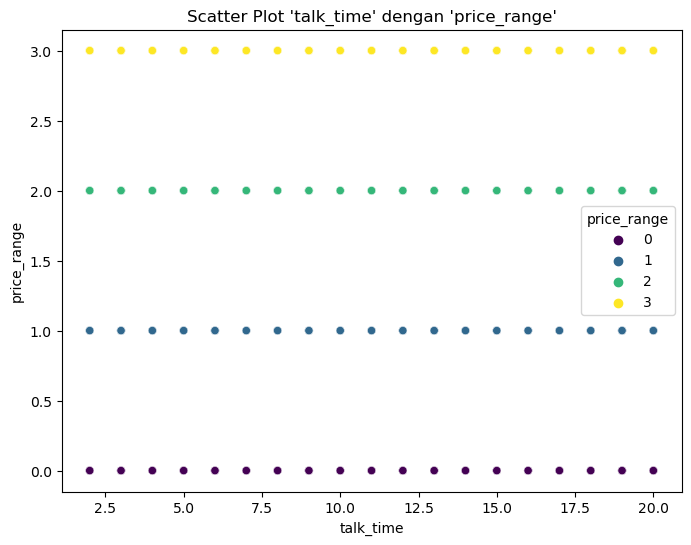

In [192]:
# Analisis Kolom talk_time
# talk_time: Waktu telepon maksimum dalam satu kali pengisian baterai
analyze_column_numeric(df, 'talk_time', 'price_range')


Statistika Dasar untuk Kolom 'three_g'


,three_g
Modus,1
Banyak memiliki three_g,1065
Banyak tidak memiliki three_g,335



Duplicate Value untuk Kolom 'three_g'
Terdapat 2 nilai yang memiliki duplicate value



Missing Value untuk Kolom 'three_g'
Tidak ada missing value pada kolom three_g

Outliers untuk Kolom 'three_g'
Identifikasi Outliers dengan IQR
Jumlah outliers dalam kolom three_g : 335
Nilai-nilai outliers: <kolom-value>
 4       0
5       0
8       0
18      0
25      0
       ..
1377    0
1379    0
1381    0
1386    0
1394    0
Name: three_g, Length: 335, dtype: int64

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom three_g


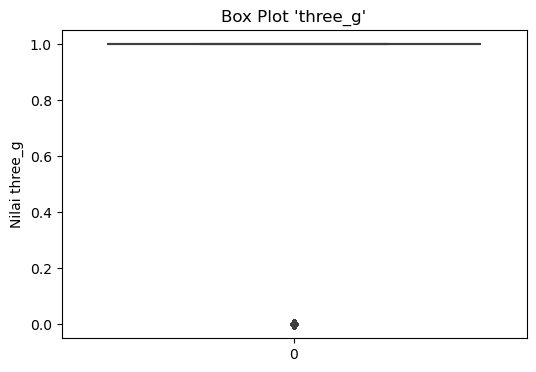

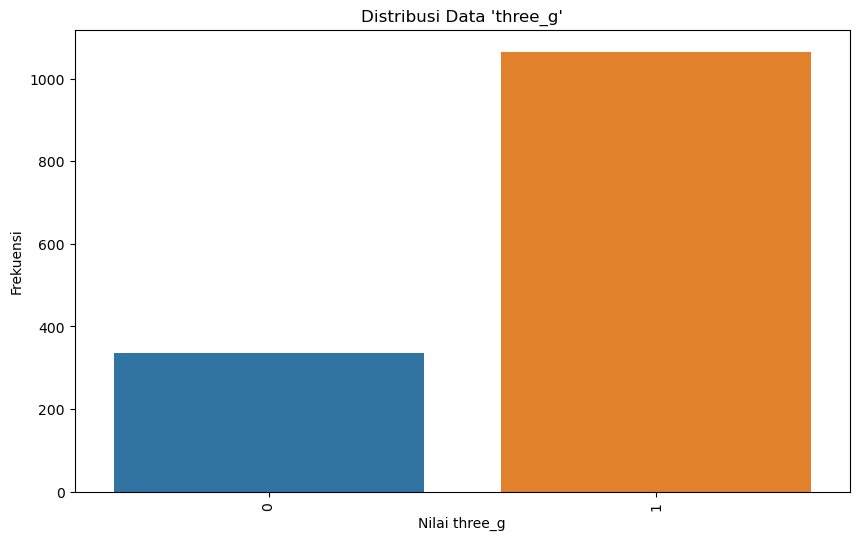


Korelasi 'three_g' dengan Kolom Target 'price_range.'
Korelasi antara 'three_g' dan 'price_range': 0.027097628312174965


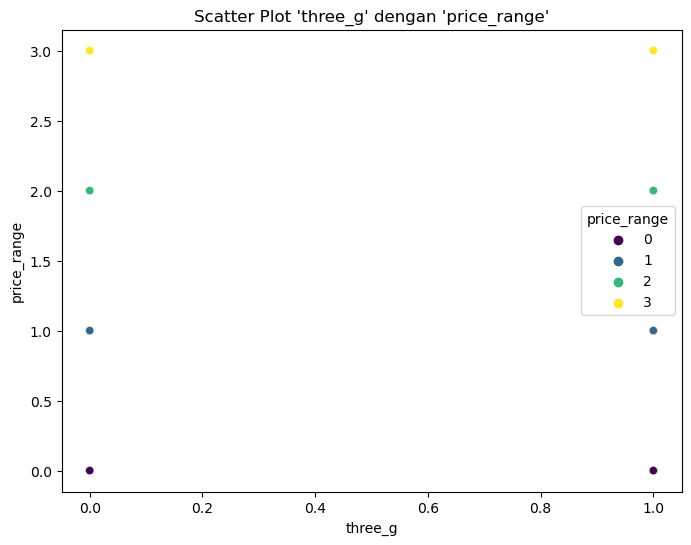

In [193]:
# Analisis Kolom three_g
# three_g: Memiliki 3G atau tidak
analyze_column_non_numeric(df, 'three_g', 'price_range')


Statistika Dasar untuk Kolom 'touch_screen'


,touch_screen
Modus,0
Banyak memiliki touch_screen,685
Banyak tidak memiliki touch_screen,715



Duplicate Value untuk Kolom 'touch_screen'
Terdapat 2 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,0,715,"[0, 1, 2, 4, 5, 6, 9, 11, 14, 16, 17, 18, 21, 22, 23, 26, 28, 29, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 46, 48, 49, 53, 54, 62, 63, 64, 65, 67, 71, 72, 74, 76, 79, 80, 82, 84, 85, 86, 88, 89, 90, 93, 94, 95, 100, 103, 104, 105, 106, 108, 110, 111, 112, 113, 118, 120, 122, 124, 125, 127, 128, 130, 131, 132, 133, 134, 137, 138, 140, 141, 146, 155, 156, 157, 159, 160, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 177, 178, 180, 181, 183, 185, 187, 189, 191, 193, 194, 196, 197, 201, 204, 205, 206, 207, 208, 209, 210, 211, 218, 221, 222, 225, 230, 232, 233, 238, 239, 240, 242, 244, 246, 248, 249, 252, 256, 257, 258, 261, 263, 265, 268, 269, 272, 275, 278, 279, 281, 282, 284, 287, 290, 291, 294, 296, 298, 299, 300, 304, 305, 306, 307, 309, 310, 313, 314, 315, 318, 320, 323, 324, 329, 331, 332, 333, 335, 336, 337, 338, 340, 341, 343, 345, 347, 348, 349, 350, 351, 353, 355, 356, 357, 360, 362, 364, 365, 367, 368, 369, 370, 372, 373, 374, 375, 377, 378, 379, 380, 381, 382, 383, 385, 387, 388, 389, 390, 391, 392, 393, 396, 398, 399, 400, 404, 405, 406, 410, 411, 412, 414, 416, 417, 418, 419, 420, 422, 423, 425, 426, 428, 431, 433, 435, 438, 439, 441, 442, 444, 445, 448, 450, 451, 457, 459, 460, 462, 463, 464, 465, 470, 471, 472, 474, 475, 476, 478, 480, 482, 484, 486, 488, 489, 493, 496, 497, 499, 500, 501, 502, 506, 507, 508, 509, 510, 511, 513, 514, 516, 517, 518, 520, 521, 522, 523, 524, 530, 531, 532, 534, 536, 539, 542, 544, 545, 546, 547, 549, 551, 552, 554, 556, 558, 560, 561, 564, 565, 566, 567, 568, 571, 572, 573, 579, 580, 583, 584, 586, 587, 588, 589, 590, 591, 594, 595, 599, 602, 604, 605, 607, 611, 613, 616, 621, 622, 623, 629, 630, 632, 633, 635, 644, 646, 656, 659, 661, 662, 663, 666, 667, 670, 671, 673, 677, 678, 679, 681, 684, 685, 686, 688, 692, 694, 698, 701, 704, 705, 706, 709, 710, 711, 714, 715, 717, 718, 719, 720, 721, 722, 724, 728, 731, 733, 734, 735, 736, 737, 739, 743, 744, 748, 750, 752, 753, 757, 759, 761, 762, 763, 764, 765, 767, 769, 770, 771, 773, 778, 779, 780, 781, 782, 783, 786, 788, 790, 792, 794, 795, 796, 798, 799, 803, 804, 807, 809, 810, 812, 814, 817, 819, 820, 825, 826, 827, 835, 836, 837, 839, 840, 841, 842, 844, 845, 847, 848, 849, 855, 863, 864, 866, 867, 869, 872, 873, 875, 876, 877, 879, 884, 885, 887, 889, 890, 892, 895, 899, 902, 903, 905, 907, 909, 917, 919, 921, 923, 924, 927, 930, 931, 932, 936, 943, 944, 945, 946, 950, 951, 952, 953, 957, 961, 964, 965, 966, 968, 970, 971, 973, 974, 976, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 990, 993, 994, 997, 1003, 1004, 1006, 1008, 1012, 1014, 1016, 1018, 1020, 1023, 1031, 1033, 1034, 1036, 1038, 1039, 1042, 1045, 1046, 1048, 1051, 1053, 1055, 1056, 1058, 1059, 1060, 1064, 1065, 1067, 1069, 1070, 1073, 1075, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1085, 1087, 1088, 1091, 1092, 1095, 1098, 1103, 1105, 1109, 1112, 1116, 1118, 1120, 1123, 1125, 1126, 1127, 1129, 1131, 1132, 1135, 1136, 1139, 1144, 1145, 1146, 1149, 1151, 1154, 1157, 1160, 1162, 1163, 1164, 1166, 1167, 1170, 1171, 1172, 1173, 1176, 1178, 1179, 1180, 1181, 1183, 1188, 1189, 1191, 1192, 1193, 1194, 1195, 1197, 1198, 1205, 1207, 1208, 1211, 1212, 1213, 1214, 1222, 1227, 1230, 1231, 1232, 1234, 1236, 1239, 1240, 1243, 1244, 1245, 1248, 1249, 1254, 1256, 1261, 1262, 1264, 1266, 1269, 1270, 1272, 1274, 1276, 1282, 1284, 1285, 1287, 1289, 1290, 1292, 1293, 1298, 1299, 1302, 1303, 1307, 1308, 1309, 1310, 1312, 1313, 1314, 1316, 1317, 1319, 1320, 1322, 1324, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1336, 1337, 1338, 1340, 1343, 1349, 1356, 1363, 1367, 1368, 1370, 1372, 1374, 1376, 1377, 1378, 1380, 1382, 1386, 1387, 1388, 1389, 1391, 1392, 1393, 1395, 1396, 1397, 1399]"
1,1,685,"[3, 7, 8, 10, 12, 13, 15, 19, 20, 24, 25, 27, 30, 31, 34, 39, 44, 45, 47, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 66, 68, 69, 70, 73, 75, 77, 78, 81, 83, 87, 91, 92, 96, 97, 98, 99, 101, 102, 107, 109, 114, 115, 116, 117, 119, 12


Missing Value untuk Kolom 'touch_screen'
Tidak ada missing value pada kolom touch_screen

Outliers untuk Kolom 'touch_screen'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom touch_screen

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom touch_screen


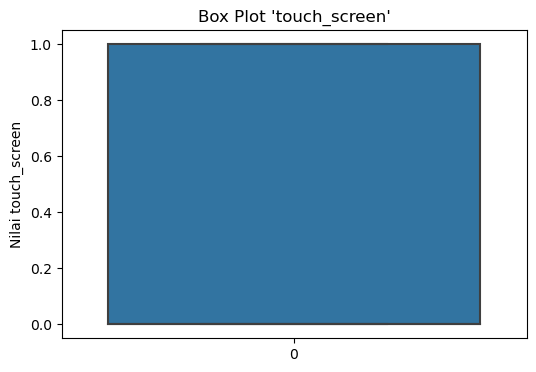

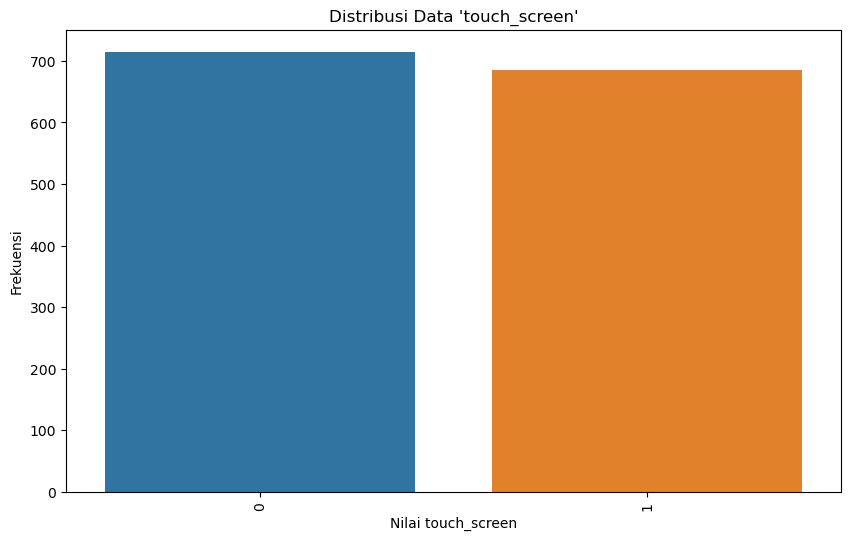


Korelasi 'touch_screen' dengan Kolom Target 'price_range.'
Korelasi antara 'touch_screen' dan 'price_range': -0.02984248010371206


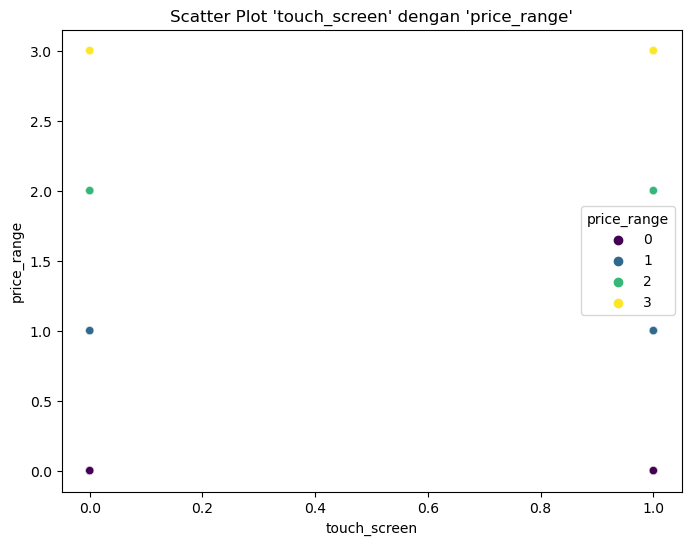

In [194]:
# Analisis Kolom touch_screen
# touch_screen: Memiliki layar sentuh atau tidak
analyze_column_non_numeric(df, 'touch_screen', 'price_range')


Statistika Dasar untuk Kolom 'wifi'


,wifi
Modus,0
Banyak memiliki wifi,693
Banyak tidak memiliki wifi,707



Duplicate Value untuk Kolom 'wifi'
Terdapat 2 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,0,707,"[0, 1, 7, 9, 14, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 28, 29, 31, 32, 33, 34, 35, 37, 38, 40, 41, 44, 45, 49, 50, 53, 54, 55, 56, 62, 64, 68, 69, 71, 72, 74, 81, 86, 87, 88, 89, 90, 91, 95, 98, 102, 105, 108, 109, 113, 117, 121, 122, 124, 127, 129, 132, 134, 141, 142, 144, 145, 146, 147, 149, 152, 153, 154, 155, 156, 157, 159, 162, 166, 167, 169, 171, 172, 173, 174, 177, 180, 183, 184, 185, 187, 191, 193, 194, 197, 199, 201, 202, 203, 204, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 229, 230, 231, 232, 233, 234, 235, 237, 239, 241, 242, 244, 245, 246, 247, 248, 249, 251, 253, 254, 257, 259, 260, 262, 263, 264, 266, 267, 268, 270, 272, 273, 274, 275, 277, 280, 282, 283, 285, 288, 289, 292, 293, 294, 295, 296, 298, 299, 301, 302, 308, 313, 318, 319, 320, 321, 324, 326, 327, 329, 330, 333, 334, 338, 339, 341, 342, 345, 346, 347, 349, 350, 351, 352, 355, 356, 357, 358, 360, 361, 363, 364, 365, 366, 367, 369, 371, 373, 374, 375, 376, 377, 378, 379, 384, 386, 387, 388, 389, 391, 392, 394, 395, 398, 400, 402, 403, 404, 405, 409, 410, 412, 413, 414, 415, 417, 418, 420, 422, 424, 427, 428, 429, 431, 433, 435, 436, 437, 438, 439, 440, 442, 443, 445, 446, 449, 450, 451, 452, 455, 457, 459, 461, 465, 468, 478, 481, 484, 485, 486, 488, 489, 490, 491, 497, 498, 501, 503, 505, 506, 509, 510, 511, 512, 513, 515, 516, 519, 522, 523, 527, 529, 530, 534, 536, 538, 540, 541, 542, 544, 548, 549, 552, 553, 556, 558, 560, 561, 564, 568, 569, 570, 571, 573, 578, 580, 582, 585, 589, 591, 592, 594, 595, 596, 600, 602, 605, 606, 608, 610, 611, 614, 615, 616, 617, 618, 621, 622, 624, 625, 626, 627, 628, 630, 631, 634, 635, 636, 637, 639, 641, 642, 646, 648, 650, 651, 654, 655, 657, 658, 659, 661, 663, 665, 666, 669, 670, 671, 672, 675, 676, 677, 679, 680, 686, 689, 690, 692, 694, 697, 700, 703, 704, 705, 706, 707, 709, 710, 711, 712, 717, 718, 721, 722, 724, 726, 731, 733, 734, 736, 737, 738, 739, 740, 741, 742, 750, 753, 755, 758, 760, 762, 763, 769, 771, 772, 773, 776, 779, 780, 781, 785, 786, 787, 790, 794, 797, 799, 802, 803, 804, 805, 807, 808, 810, 814, 815, 817, 818, 819, 820, 821, 823, 825, 830, 831, 832, 833, 836, 838, 841, 842, 843, 845, 846, 848, 849, 850, 853, 855, 856, 862, 863, 865, 866, 868, 870, 871, 872, 879, 880, 884, 885, 891, 893, 898, 899, 900, 904, 905, 907, 909, 918, 922, 924, 925, 931, 935, 936, 940, 943, 946, 951, 954, 961, 962, 964, 965, 976, 980, 983, 985, 986, 987, 988, 991, 993, 994, 995, 998, 999, 1000, 1002, 1004, 1005, 1008, 1009, 1015, 1018, 1020, 1021, 1024, 1025, 1029, 1043, 1045, 1046, 1050, 1052, 1053, 1054, 1056, 1060, 1061, 1062, 1063, 1064, 1067, 1068, 1071, 1073, 1075, 1077, 1082, 1083, 1084, 1085, 1088, 1090, 1093, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1112, 1115, 1117, 1118, 1119, 1120, 1121, 1123, 1124, 1126, 1129, 1132, 1133, 1134, 1136, 1138, 1139, 1141, 1142, 1145, 1149, 1152, 1154, 1158, 1159, 1160, 1161, 1162, 1164, 1168, 1170, 1172, 1175, 1176, 1179, 1180, 1182, 1183, 1185, 1186, 1191, 1193, 1195, 1198, 1201, 1204, 1205, 1208, 1210, 1215, 1216, 1217, 1218, 1219, 1221, 1224, 1225, 1226, 1228, 1230, 1231, 1233, 1234, 1237, 1238, 1242, 1243, 1244, 1245, 1246, 1247, 1249, 1250, 1251, 1253, 1254, 1256, 1258, 1259, 1260, 1262, 1263, 1267, 1268, 1269, 1270, 1271, 1273, 1274, 1275, 1276, 1278, 1279, 1282, 1283, 1285, 1287, 1291, 1292, 1293, 1295, 1297, 1298, 1299, 1306, 1307, 1308, 1310, 1311, 1313, 1316, 1323, 1324, 1325, 1326, 1327, 1329, 1330, 1331, 1334, 1335, 1337, 1339, 1340, 1342, 1344, 1347, 1352, 1353, 1356, 1357, 1358, 1359, 1360, 1363, 1364, 1365, 1366, 1369, 1372, 1373, 1377, 1380, 1383, 1384, 1385, 1386, 1387, 1393, 1397]"
1,1,693,"[2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 17, 20, 27, 30, 36, 39, 42, 43, 46, 47, 48, 51, 52, 57, 58, 59, 60, 61, 63, 65, 66, 67, 70, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 92, 93, 94, 96, 97, 99, 100, 101, 103, 104, 106, 107, 110, 111, 112, 114, 115, 116,


Missing Value untuk Kolom 'wifi'
Tidak ada missing value pada kolom wifi

Outliers untuk Kolom 'wifi'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom wifi

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom wifi


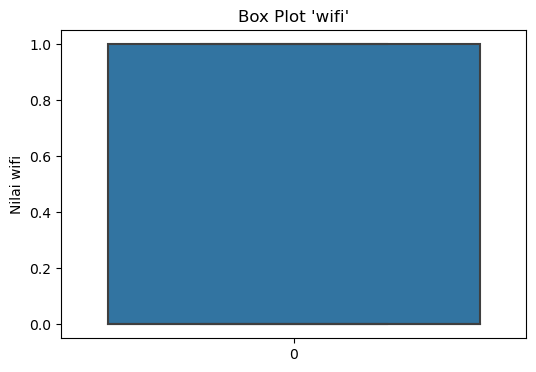

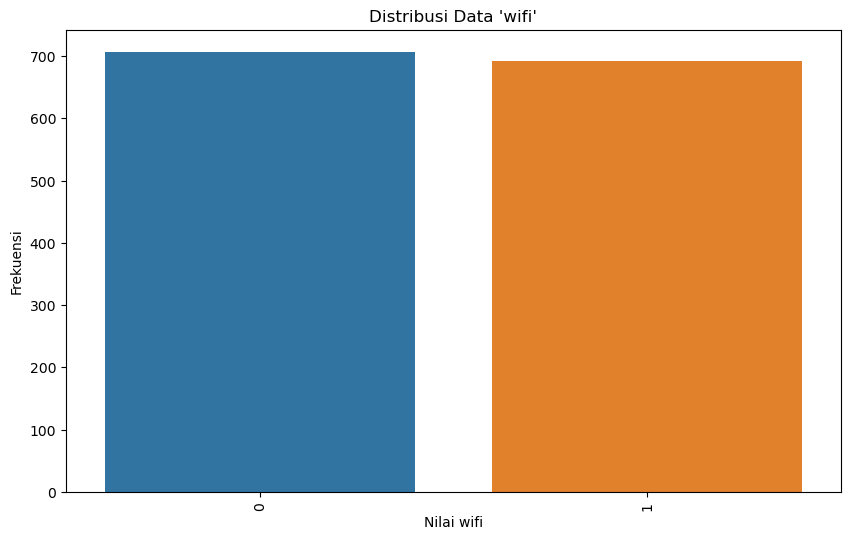


Korelasi 'wifi' dengan Kolom Target 'price_range.'
Korelasi antara 'wifi' dan 'price_range': 0.0343293576211729


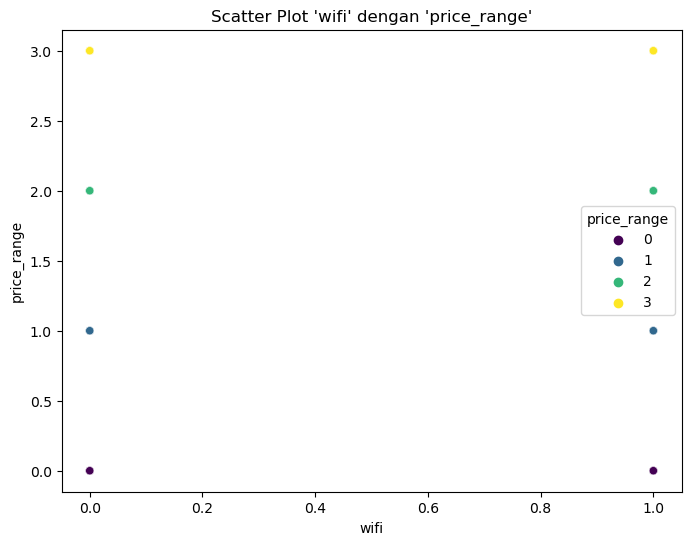

In [195]:
# Analisis Kolom wifi
# wifi: Memiliki wifi atau tidak
analyze_column_non_numeric(df, 'wifi', 'price_range')


Statistika Dasar untuk Kolom 'price_range'


,price_range
Modus,0
Median,1.000000
Banyak data dengan nilai 0,358
Banyak data dengan nilai 1,356
Banyak data dengan nilai 2,345
Banyak data dengan nilai 3,341



Duplicate Value untuk Kolom 'price_range'
Terdapat 4 nilai yang memiliki duplicate value


,Nilai Duplikat,Banyak Duplikat,Indeks Baris
0,0,358,"[3, 4, 6, 14, 16, 22, 23, 25, 27, 34, 35, 46, 50, 53, 61, 63, 69, 72, 73, 78, 83, 85, 86, 89, 95, 97, 104, 106, 110, 111, 114, 120, 126, 127, 128, 129, 133, 135, 137, 138, 140, 148, 150, 151, 152, 153, 160, 166, 168, 170, 171, 176, 179, 181, 182, 187, 191, 196, 204, 207, 208, 212, 216, 220, 223, 225, 237, 244, 248, 253, 254, 256, 262, 263, 266, 270, 272, 273, 275, 283, 285, 286, 295, 296, 301, 305, 318, 323, 325, 326, 327, 329, 330, 332, 336, 338, 345, 349, 350, 351, 357, 358, 369, 371, 374, 380, 396, 399, 400, 401, 403, 406, 418, 427, 429, 434, 435, 437, 447, 453, 460, 461, 469, 471, 472, 478, 483, 489, 492, 497, 498, 501, 512, 514, 515, 516, 517, 524, 525, 528, 533, 534, 542, 543, 547, 550, 554, 561, 562, 563, 565, 572, 573, 578, 579, 586, 587, 588, 590, 591, 594, 598, 599, 608, 611, 615, 617, 622, 626, 630, 634, 637, 638, 641, 642, 644, 645, 664, 667, 670, 672, 673, 674, 675, 678, 685, 692, 693, 699, 701, 709, 712, 713, 716, 717, 722, 730, 735, 736, 738, 739, 740, 741, 745, 751, 757, 760, 764, 766, 769, 771, 776, 781, 787, 794, 796, 805, 806, 813, 814, 818, 819, 828, 830, 832, 837, 838, 840, 849, 851, 873, 878, 890, 893, 904, 905, 907, 909, 912, 915, 925, 927, 940, 942, 944, 949, 950, 951, 955, 959, 962, 968, 973, 977, 978, 980, 984, 1001, 1002, 1008, 1010, 1011, 1017, 1019, 1024, 1050, 1052, 1053, 1056, 1059, 1060, 1063, 1065, 1067, 1074, 1075, 1076, 1085, 1090, 1092, 1095, 1102, 1104, 1107, 1109, 1115, 1119, 1122, 1130, 1140, 1141, 1142, 1144, 1148, 1157, 1158, 1159, 1161, 1168, 1172, 1179, 1183, 1185, 1189, 1191, 1195, 1197, 1207, 1209, 1213, 1215, 1227, 1241, 1248, 1250, 1253, 1254, 1264, 1273, 1278, 1283, 1286, 1287, 1291, 1294, 1296, 1297, 1302, 1303, 1304, 1307, 1312, 1316, 1321, 1326, 1329, 1333, 1338, 1340, 1341, 1346, 1349, 1352, 1353, 1355, 1357, 1360, 1364, 1366, 1369, 1371, 1373, 1375, 1388, 1389, 1390, 1395, 1397]"
1,1,356,"[0, 5, 7, 12, 18, 19, 26, 29, 33, 37, 40, 41, 42, 44, 48, 52, 55, 62, 64, 67, 68, 70, 76, 80, 82, 88, 91, 93, 94, 98, 99, 100, 107, 116, 118, 119, 123, 124, 136, 139, 143, 145, 149, 154, 155, 158, 165, 174, 180, 186, 193, 198, 200, 201, 202, 203, 210, 211, 213, 217, 218, 222, 224, 229, 231, 233, 234, 235, 236, 240, 243, 245, 247, 250, 258, 259, 264, 265, 268, 276, 289, 290, 300, 302, 310, 322, 339, 340, 341, 346, 347, 352, 355, 359, 363, 367, 370, 373, 378, 383, 385, 389, 391, 402, 405, 408, 409, 410, 420, 424, 425, 432, 433, 436, 438, 439, 441, 443, 445, 449, 450, 451, 452, 456, 458, 459, 462, 470, 479, 480, 485, 490, 493, 502, 503, 504, 506, 507, 508, 509, 510, 522, 526, 527, 529, 535, 548, 551, 553, 555, 559, 564, 566, 570, 574, 577, 581, 583, 589, 593, 597, 600, 601, 602, 603, 606, 607, 609, 610, 619, 621, 623, 631, 632, 639, 640, 643, 646, 651, 654, 655, 663, 666, 677, 686, 694, 695, 697, 700, 703, 705, 707, 715, 725, 726, 728, 734, 752, 754, 758, 759, 763, 765, 767, 770, 773, 774, 775, 779, 785, 791, 792, 793, 797, 800, 801, 807, 811, 820, 825, 829, 833, 843, 846, 848, 854, 858, 861, 863, 864, 866, 869, 874, 881, 882, 891, 892, 894, 901, 902, 922, 930, 931, 933, 937, 952, 953, 960, 964, 966, 969, 979, 981, 985, 987, 988, 993, 994, 997, 998, 1000, 1012, 1022, 1023, 1030, 1036, 1039, 1045, 1046, 1048, 1049, 1055, 1057, 1062, 1068, 1069, 1070, 1077, 1078, 1079, 1080, 1081, 1088, 1093, 1096, 1097, 1100, 1101, 1105, 1110, 1111, 1112, 1128, 1133, 1136, 1137, 1143, 1145, 1146, 1153, 1154, 1165, 1167, 1169, 1171, 1175, 1180, 1182, 1186, 1196, 1201, 1204, 1208, 1218, 1221, 1226, 1228, 1229, 1232, 1235, 1237, 1239, 1259, 1260, 1261, 1267, 1269, 1272, 1274, 1277, 1306, 1310, 1311, 1313, 1314, 1315, 1317, 1318, 1322, 1323, 1325, 1335, 1339, 1347, 1350, 1351, 1359, 1367, 1368, 1374, 1379, 1382, 1392, 1393, 1394, 1399]"
2,2,345,"[1, 2, 9, 11, 15, 28, 30, 32, 38, 43, 51, 54, 57, 65, 66, 71, 74, 75, 77, 79, 84, 87, 90, 92, 101, 102, 108, 117, 122, 130, 131, 141, 144, 147, 157, 167, 188, 189, 192, 194, 197, 209, 215, 219, 221, 227, 228, 239, 242, 2


Missing Value untuk Kolom 'price_range'
Tidak ada missing value pada kolom price_range

Outliers untuk Kolom 'price_range'
Identifikasi Outliers dengan IQR
Tidak ada outlier dalam kolom price_range

Identifikasi Outliers dengan Z-Score
Tidak ada outlier dalam kolom price_range


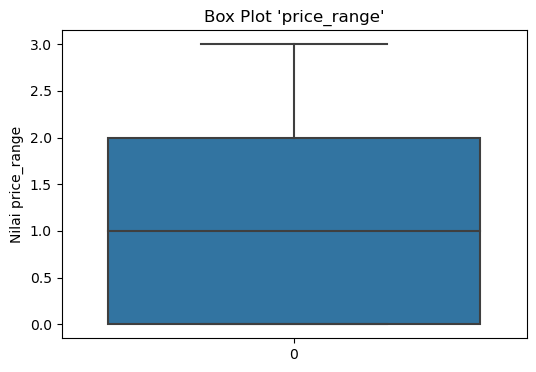

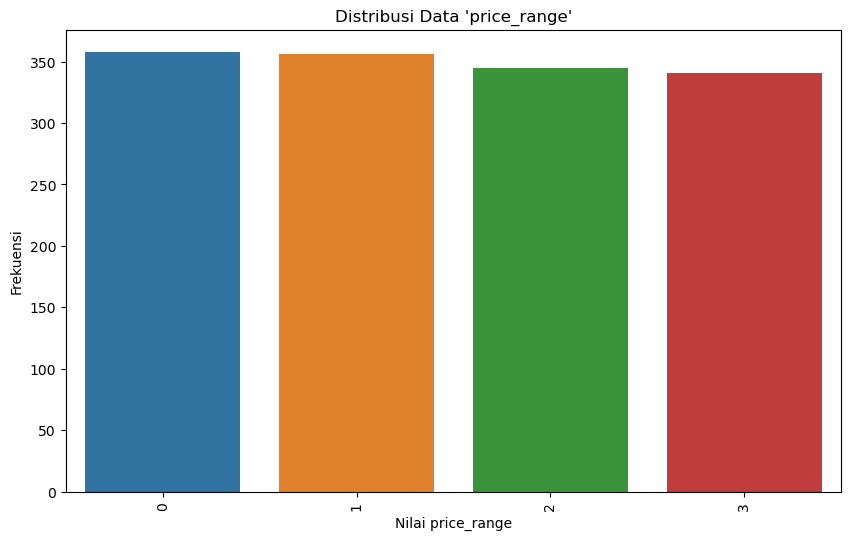

In [196]:
# Analisis Kolom price_range
# price_range (target): Rentang harga dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2(biaya tinggi) atau 3 (biaya sangat tinggi).
analyze_column_target(df, 'price_range')

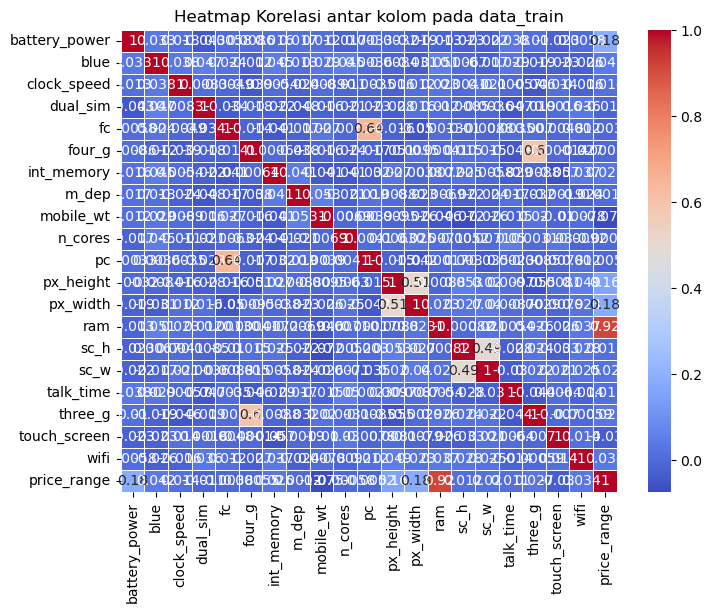


Analisis Duplicate Value Kolom 1-20
Tidak ada duplicate values

Analisis Duplicate Value Data Latih
Tidak ada duplicate values


In [197]:
# Analisis data_train keseluruha

# Analisis korelasi keseluruhan data latih dengan Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi antar kolom pada data_train")
plt.show()

# Memeriksa duplikat di atribut 1-20 (selain target value) untuk menentukan konsistensi data
print("\n" + Fore.CYAN + '\033[1m' + "Analisis Duplicate Value Kolom 1-20" + '\033[0m')
columns_to_check = df.columns[:20]
duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]

if(len(duplicates) == 0):
    print("Tidak ada duplicate values")
else : 
    print("Duplicate Rows:")
    print(duplicates)
    
# Memeriksa duplikat value keseluruhan kolom
print("\n" + Fore.CYAN + '\033[1m' + "Analisis Duplicate Value Data Latih" + '\033[0m')
columns_to_check = df.columns[:21]
duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]

if(len(duplicates) == 0):
    print("Tidak ada duplicate values")
else : 
    print("Duplicate Rows:")
    print(duplicates)